## Manitoba Wildfire Prediction - Final Project for Predictive Analytics

### _By Angela Vargas

The wildfire in Canada is one of the most visible problems causing enviromental and economic issues, background information for this project was found in the following links from Canada Goverment Website:https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi

and the following information for Manitoba Goverment Website: https://www.gov.mb.ca/nrnd/wildfire_program/ where the dataset was downloaded using web scraping.

#### Download Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline

import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Load Data Set

In [2]:
# load dataset
mb_data = pd.read_excel('mb_data.xlsx')
print(mb_data.head())

              STATION  TEMP    RH     WD    WS  RAIN  FFMC   DMC     DC  ISI  \
0           ATIK LAKE  -3.7  44.0  225.0  13.2   0.0  85.2   0.1  214.3  4.2   
1             BISSETT  -4.3  47.0  225.0  18.9   2.8  62.3   0.0  171.5  1.2   
2       BRANDON (YBR)  -6.8  97.0  165.0  15.0   0.0  76.4  36.9  442.6  1.8   
3  BERENS RIVER (WCF)  -9.3  68.0  168.0  17.0   0.0  79.9   0.1   90.1  2.7   
4      BURNTWOOD LAKE  -7.6  54.0  232.0  11.3   0.0  83.7   6.9  236.3  3.1   

    BUI  FWI  DSR       Date  
0   0.2  0.9  0.0 2015-03-02  
1   0.2  0.3  0.0 2015-03-02  
2  61.1  6.2  0.7 2015-03-02  
3   0.2  0.6  0.0 2015-03-02  
4  12.9  3.8  0.3 2015-03-02  


Data set recollected using another code for web scrapping - from https://www.gov.mb.ca/conservation_fire/Wx-Report/index.html

### Data General Exploration
- Original dataset exploration

In [3]:
mb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190557 entries, 0 to 190556
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   STATION  190557 non-null  object        
 1   TEMP     190557 non-null  float64       
 2   RH       190541 non-null  float64       
 3   WD       190537 non-null  float64       
 4   WS       190557 non-null  float64       
 5   RAIN     190554 non-null  float64       
 6   FFMC     190557 non-null  float64       
 7   DMC      190557 non-null  float64       
 8   DC       190557 non-null  float64       
 9   ISI      190556 non-null  float64       
 10  BUI      190556 non-null  float64       
 11  FWI      190556 non-null  float64       
 12  DSR      190556 non-null  float64       
 13  Date     190557 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 20.4+ MB


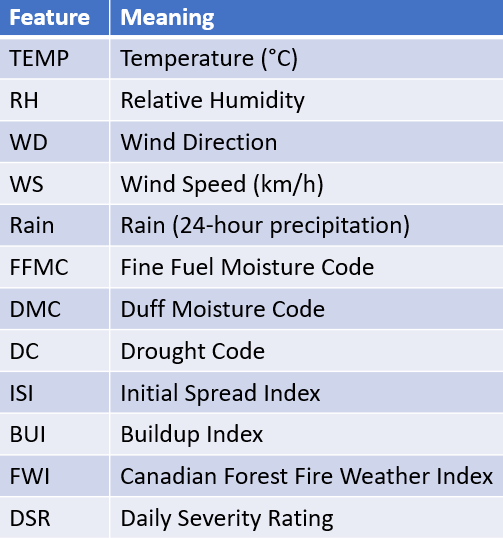 

In [4]:
#datasets statistic description
mb_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
STATION,190557,130,GREEN LAKE,2563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,190557.0,NaN,NaN,NaN,10.854285,-57.2,2.2,14.1,21.1,58.1,13.183865
RH,190541.0,NaN,NaN,NaN,59.191213,0.0,43.0,58.0,75.0,100.0,20.400241
WD,190537.0,NaN,NaN,NaN,195.795069,0.0,113.0,209.0,285.0,360.0,103.500065
WS,190557.0,NaN,NaN,NaN,12.935509,0.0,8.0,11.8,16.5,67.0,7.071595
RAIN,190554.0,NaN,NaN,NaN,1.60486,-8.8,0.0,0.0,0.5,239.5,5.404738
FFMC,190557.0,NaN,NaN,NaN,74.75178,0.0,69.8,80.9,87.4,99.9,18.602607
DMC,190557.0,NaN,NaN,NaN,21.07517,0.0,5.5,15.4,30.3,248.1,20.669251
DC,190557.0,NaN,NaN,NaN,243.518889,-12.1,132.1,231.2,338.4,862.7,144.342453
ISI,190556.0,NaN,NaN,NaN,4.090374,-14.4,1.1,2.5,5.7,175.0,4.823863


In [5]:
# data check missing values of all features
mb_data.isnull().sum()

STATION     0
TEMP        0
RH         16
WD         20
WS          0
RAIN        3
FFMC        0
DMC         0
DC          0
ISI         1
BUI         1
FWI         1
DSR         1
Date        0
dtype: int64

### Data Cleaning

Complete dataset cleaning, handle missing values, duplicates

In [6]:
#Preparing KNN imputer to replace missing values
from sklearn.impute import KNNImputer
numerical = mb_data.select_dtypes(include=[np.number,'float']).columns.to_list()
select_data = mb_data[numerical]

In [7]:
#Applying KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(select_data)
imputed_df = pd.DataFrame(imputed_data, columns=numerical)
#using this as example: https://medium.com/@bhanupsingh484/handling-missing-data-with-knn-imputer-927d49b09015

In [8]:
# Updating original dataset with new dataframe without missing values
mb_data[["TEMP","RH","WD","WS","RAIN","FFMC","DMC",
         "DC","ISI","BUI","FWI","DSR"]] = imputed_df[["TEMP","RH","WD","WS","RAIN","FFMC",
                                                      "DMC","DC","ISI","BUI","FWI","DSR"]]

In [9]:
#Verifying handled null values
mb_data.isnull().sum()

STATION    0
TEMP       0
RH         0
WD         0
WS         0
RAIN       0
FFMC       0
DMC        0
DC         0
ISI        0
BUI        0
FWI        0
DSR        0
Date       0
dtype: int64

In [10]:
#Checking unique values
mb_data.nunique()

STATION     130
TEMP        748
RH          111
WD          377
WS          469
RAIN        660
FFMC        977
DMC        1441
DC         7022
ISI         569
BUI        1799
FWI         818
DSR         620
Date       2657
dtype: int64

In [11]:
#Checking duplicate rows
duplicates = mb_data.duplicated(subset=["TEMP","RH","WD","WS","RAIN","FFMC","DMC",
         "DC","ISI","BUI","FWI","DSR"], keep=False)

In [12]:
print("Duplicated rows based on Subset:\n", mb_data[duplicates])

Duplicated rows based on Subset:
                STATION  TEMP    RH    WD    WS  RAIN  FFMC   DMC    DC  ISI  \
163799     PISEW FALLS   9.6  45.0  55.0  15.0   0.0  88.4  27.6  72.0  7.2   
163822  THOMPSON (PTO)   9.6  45.0  55.0  15.0   0.0  88.4  27.6  72.0  7.2   

         BUI   FWI  DSR       Date  
163799  28.2  13.0  2.6 2023-05-23  
163822  28.2  13.0  2.6 2023-05-23  


###### Note. I'll keep the duplicated values since the station is different and sometimes the observations are missed and to get data, they use a technique to get the observations captured using the closest station, which demostrates this was the reason to happen this duplication but different station.

Data Counts By Station

In [13]:
# Checking data distribution by station
mb_data["STATION"].value_counts(normalize=True)

STATION
GREEN LAKE             0.013450
WOODRIDGE              0.013335
FALCON LAKE            0.013266
FLANDERS LAKE          0.013245
BISSETT                0.013224
                         ...   
GEORGE ISLAND (WWS)    0.000079
SNOW LAKE (POW)        0.000079
DEEP LAKE (RMNP)       0.000073
KIPPANS MILL (RMNP)    0.000073
YORKTON (PRJ)          0.000073
Name: proportion, Length: 130, dtype: float64

In [14]:
#Unifying Station names:
name_mapping = {
    'OAK POINT MARINE WOJ': 'OAK POINT MARINE (WOJ)',
    'OAKPOINT MRN (WOJ)': 'OAK POINT MARINE (WOJ)',
    'OAK POINT MARINE W0J': 'OAK POINT MARINE (WOJ)',
    'SNOW LAKE':'SNOW LAKE (POW)',
    'SNOW LAKE (POW)': 'SNOW LAKE (POW)',
    'GEORGE ISLAND (WWS)':'GEORGE ISLAND (WWS)',
    'LAKE ST GEORGE': 'GEORGE ISLAND (WWS)',
    'KIPPANS MILL (RMNP)':'KIPPANS MILL (RMNP)',
    'KIPPENS MILL':'KIPPANS MILL (RMNP)',
    'DEEP LAKE': 'DEEP LAKE (RMNP)',
    'DEEP LAKE (RMNP)':'DEEP LAKE (RMNP)',
    'CYPRESS RIVER': 'CYPRESS RIVER (POY)',
    'CYPRESS RIVER (POY)':'CYPRESS RIVER (POY)',
    'DEERWOOD (XDW)':'DEERWOOD (XDW)',
    'DEERWOOD':'DEERWOOD (XDW)',
    'GARYS MEADOW': 'GARYS MEADOW',
    "GARY'S MEADOW":'GARYS MEADOW',
    'MINITONAS':'MINITONAS AG',
    'MINITONAS AG':'MINITONAS AG',
    'STEAD': 'STEAD AG',
    'STEAD AG':'STEAD AG',
    'WILSON CR WEIR (WOO)':'WILSON CREEK (WOO)',
    'WILSON CREEK (WOO)': 'WILSON CREEK (WOO)'
    }

In [15]:
#Aplying the names to replace the incorrect and removing typos and normalizing
mb_data['STATION'] = mb_data['STATION'].map(name_mapping).fillna(mb_data['STATION'])

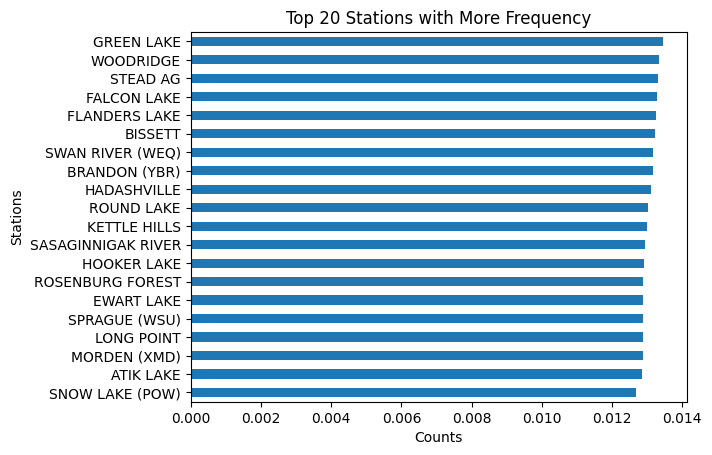

In [16]:
#Plot the bar grahp of the Top Stations by percentages
top_Stations = mb_data["STATION"].value_counts(normalize=True).head(20)
top_Stations.sort_values(ascending=True).plot.barh() 
plt.title('Top 20 Stations with More Frequency')
plt.xlabel('Counts')
plt.ylabel('Stations')
plt.show()

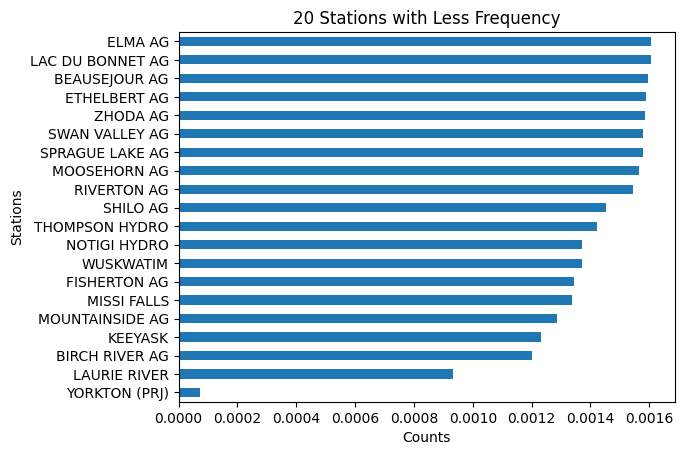

In [17]:
#Plot the bar graph of the Stations with less percentages
top_Stations = mb_data["STATION"].value_counts(normalize=True).tail(20)
top_Stations.sort_values(ascending=True).plot.barh() 
plt.title('20 Stations with Less Frequency')
plt.xlabel('Counts')
plt.ylabel('Stations')
plt.show()

In [18]:
mb_data.head(3)

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02


In [19]:
#Save cleaned and prepared dataset
mb_data.to_csv('mb_data_clean.csv', index=False)

### Data Statistic Exploration

In [20]:
#Checking dataset statistics to validate outliers
mb_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
STATION,190557,118,GREEN LAKE,2563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,190557.0,NaN,NaN,NaN,10.854285,-57.2,2.2,14.1,21.1,58.1,13.183865
RH,190557.0,NaN,NaN,NaN,59.190846,0.0,43.0,58.0,75.0,100.0,20.399719
WD,190557.0,NaN,NaN,NaN,195.795691,0.0,113.0,209.0,285.0,360.0,103.495316
WS,190557.0,NaN,NaN,NaN,12.935509,0.0,8.0,11.8,16.5,67.0,7.071595
RAIN,190557.0,NaN,NaN,NaN,1.604851,-8.8,0.0,0.0,0.5,239.5,5.404698
FFMC,190557.0,NaN,NaN,NaN,74.75178,0.0,69.8,80.9,87.4,99.9,18.602607
DMC,190557.0,NaN,NaN,NaN,21.07517,0.0,5.5,15.4,30.3,248.1,20.669251
DC,190557.0,NaN,NaN,NaN,243.518889,-12.1,132.1,231.2,338.4,862.7,144.342453
ISI,190557.0,NaN,NaN,NaN,4.090368,-14.4,1.1,2.5,5.7,175.0,4.823851


Outliers Plot

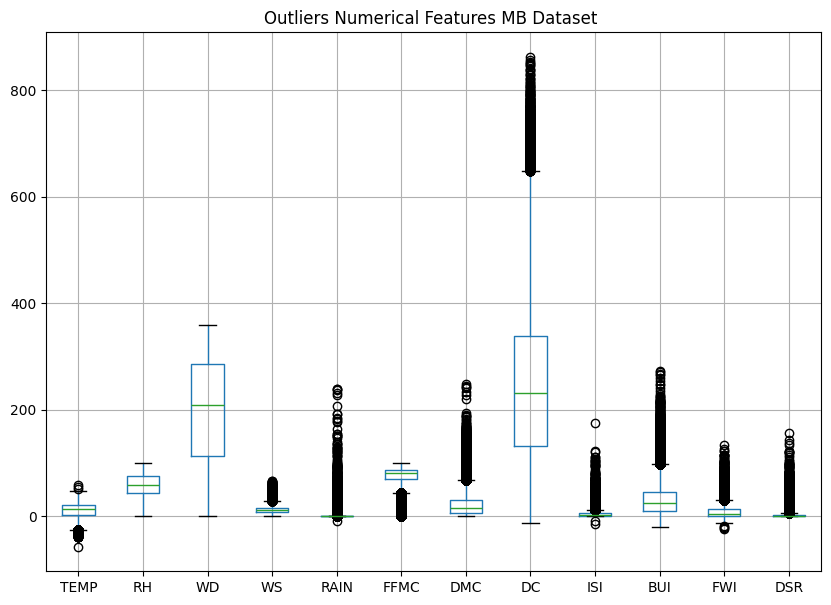

In [21]:
# Check outliers of all numerical features dataset
%matplotlib inline
mb_data.boxplot(column=['TEMP','RH','WD','WS','RAIN','FFMC','DMC','DC','ISI','BUI','FWI','DSR'],
                return_type='axes',figsize=(10,7))
plt.title("Outliers Numerical Features MB Dataset ")
plt.show()

###### Note. I'll keep the outlier values since they are important size of the dataset, more than 3 or 5%, and there is not explanation to the weather changes.

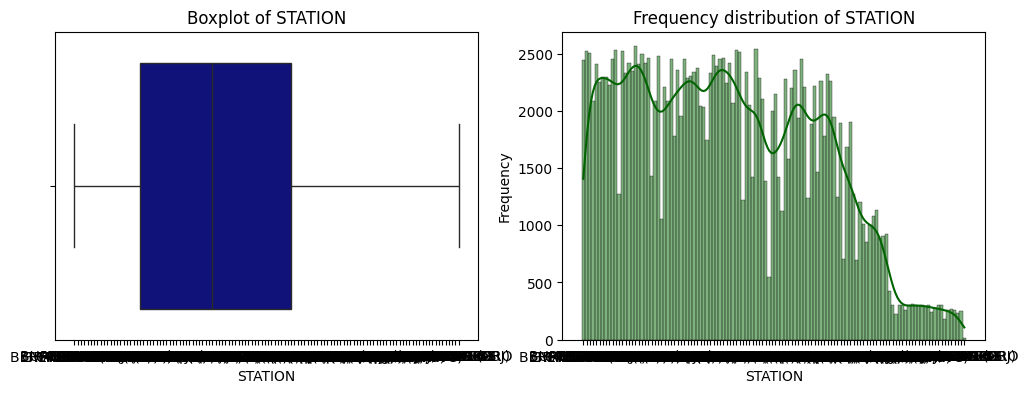

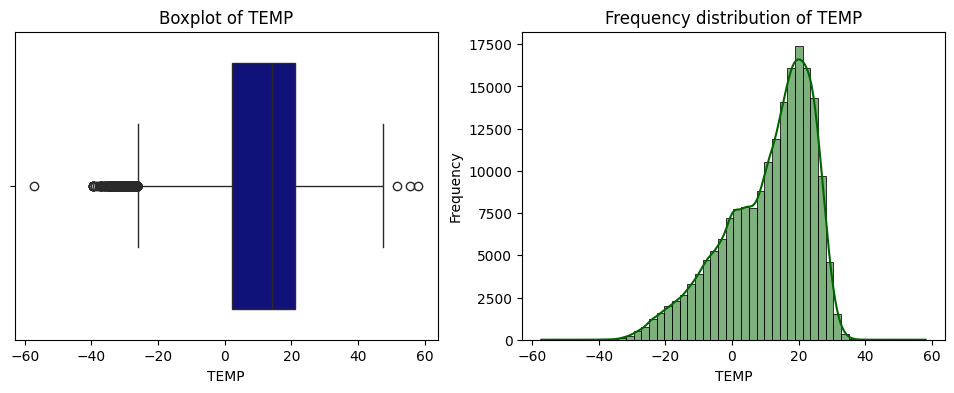

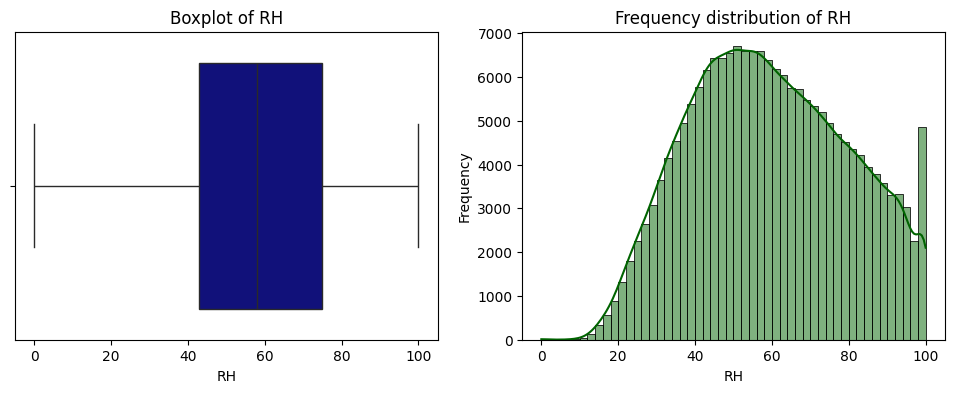

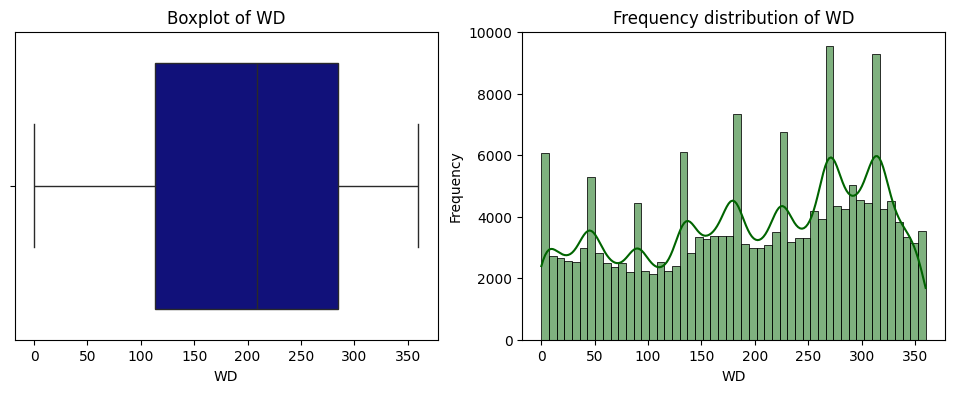

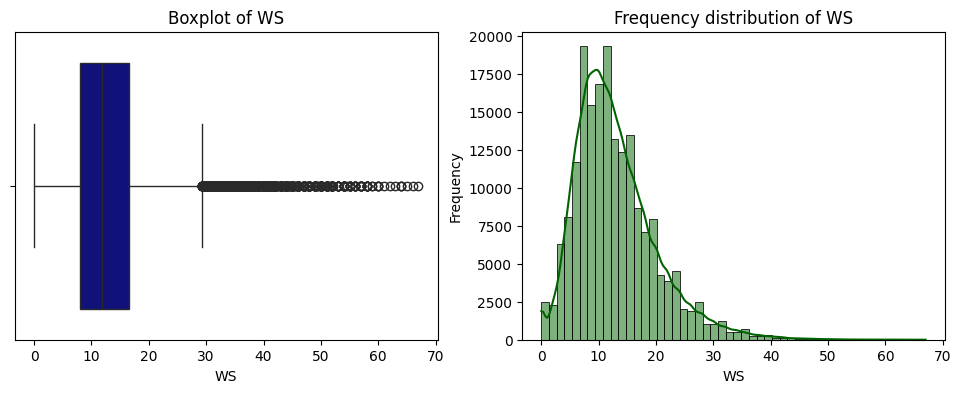

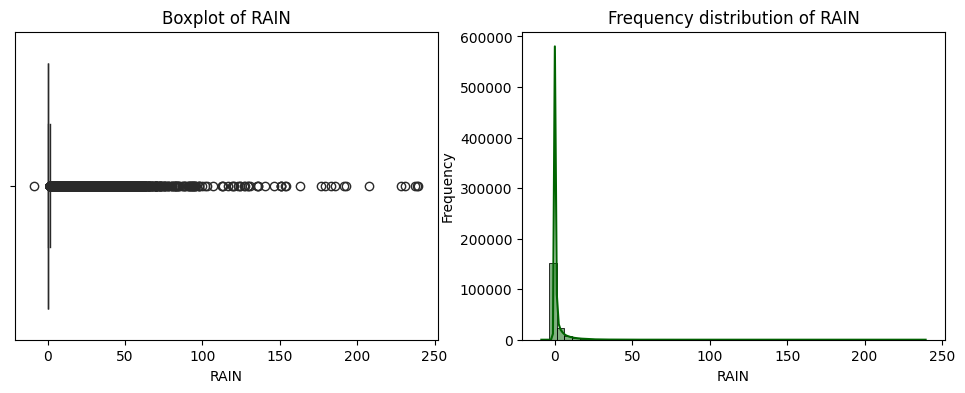

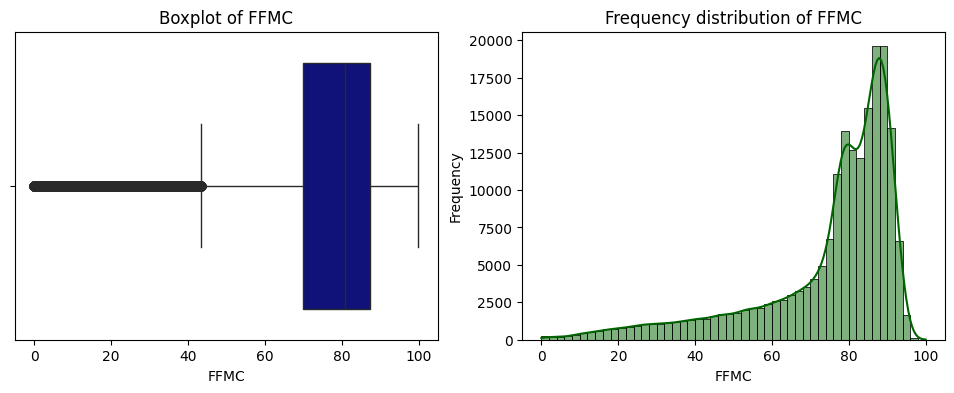

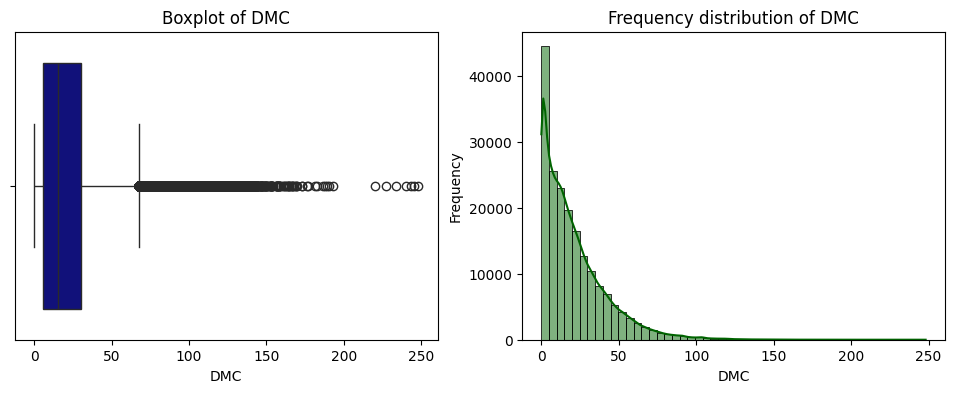

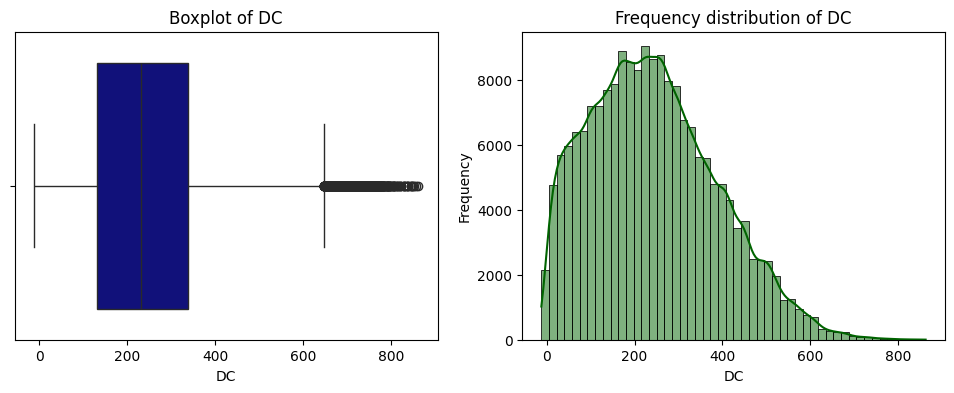

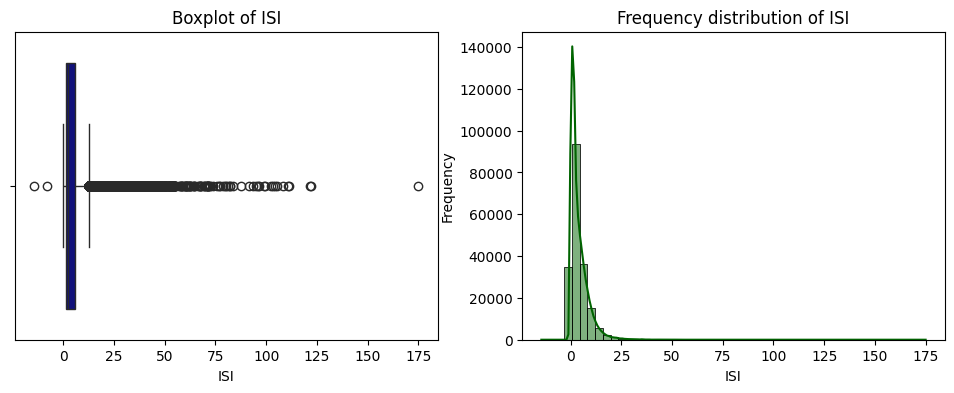

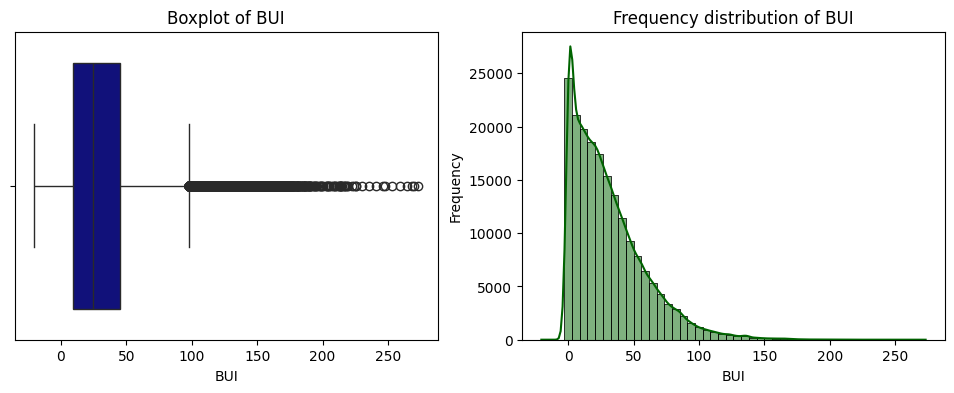

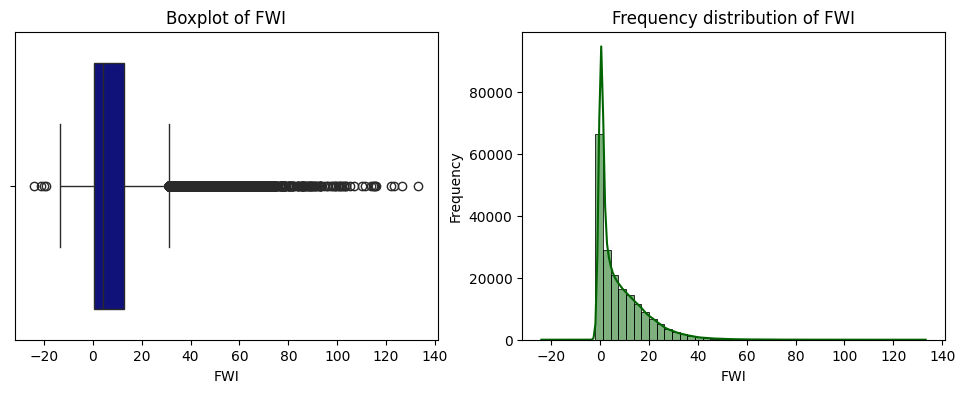

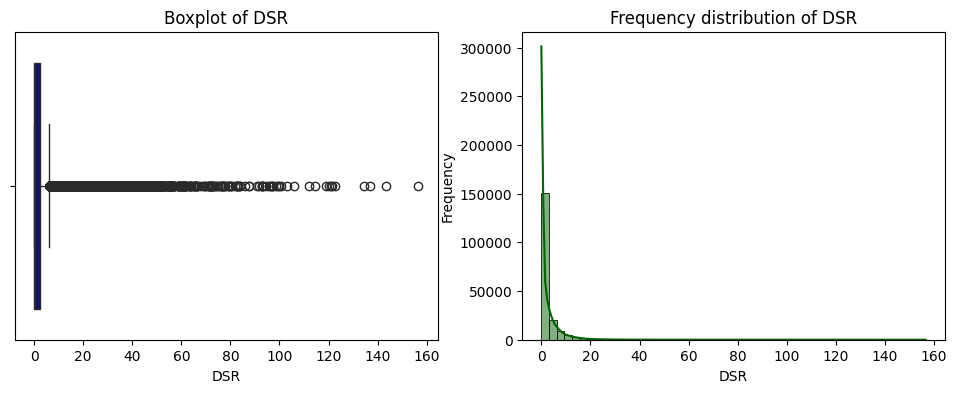

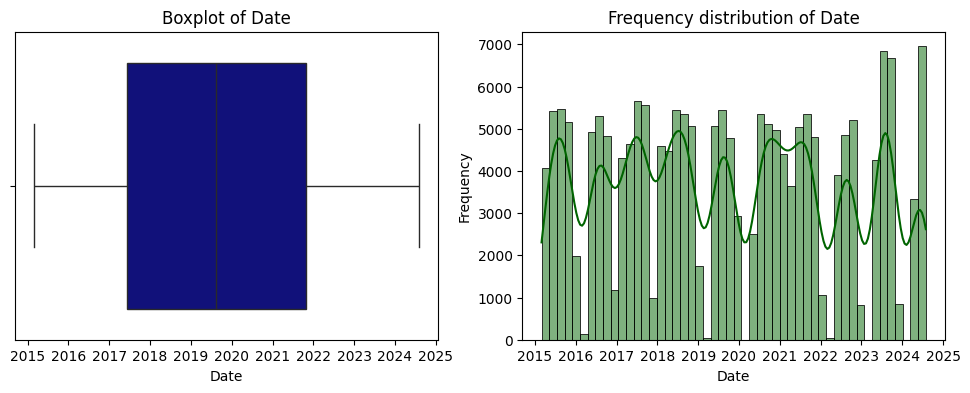

In [22]:
# Checking for outliers individually
for column in mb_data.columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.boxplot(mb_data[column], orient='h', color='darkblue', ax=ax1)
    ax1.set_xlabel(f'{column}')
    ax1.set_title(f'Boxplot of {column}')

    sns.histplot(mb_data[column], bins=50, color='darkgreen', kde=True, ax=ax2)
    ax2.set_xlabel(f'{column}')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Frequency distribution of {column}')

###### Note. the ouliers will not be removed due to the nature of the data, these are Weather conditions - observations and calculations which do not have standard patterns through the time.

In [23]:
#Check again the dtype with not null values
mb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190557 entries, 0 to 190556
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   STATION  190557 non-null  object        
 1   TEMP     190557 non-null  float64       
 2   RH       190557 non-null  float64       
 3   WD       190557 non-null  float64       
 4   WS       190557 non-null  float64       
 5   RAIN     190557 non-null  float64       
 6   FFMC     190557 non-null  float64       
 7   DMC      190557 non-null  float64       
 8   DC       190557 non-null  float64       
 9   ISI      190557 non-null  float64       
 10  BUI      190557 non-null  float64       
 11  FWI      190557 non-null  float64       
 12  DSR      190557 non-null  float64       
 13  Date     190557 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 20.4+ MB


Distribution Plots - Correlation Analysis

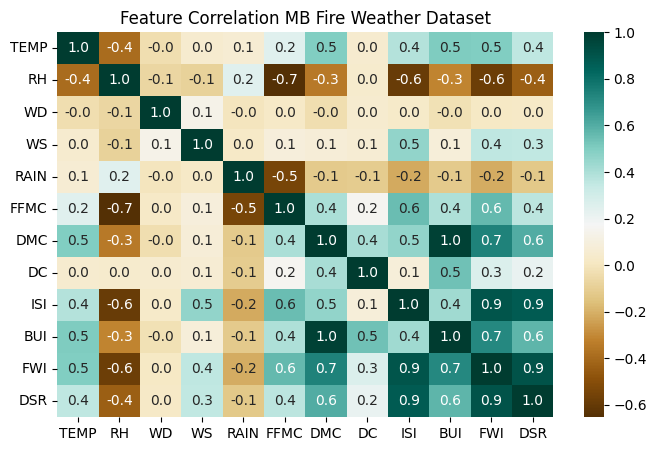

In [23]:
#Checking correlation of features
corr_matrix = mb_data[['TEMP','RH','WD','WS','RAIN','FFMC','DMC','DC','ISI','BUI','FWI','DSR']].corr()
fig, ax = plt.subplots(figsize=(8, 5))
# feature correlations heatmap
sns.heatmap(corr_matrix, annot=True, cmap ='BrBG',fmt='.1f')
plt.title('Feature Correlation MB Fire Weather Dataset')
plt.show()

DSR Frequency Distribution by Severity Range

In [25]:
# Converting the DataFrame into Series or one dimensional
Series = mb_data['DSR']

#Defining bins for DSR depending on ranges for Canada Wildfire System
bins = [0, 1, 3, 5, 15, mb_data['DSR'].max()]

# adding a new column to the DataFrame representing time categories
categories = pd.cut(Series, bins, include_lowest = True, right=False)

# Create the frequency table for DSR
frequency_table= pd.Series(categories).value_counts().sort_index()

# #Calculation of relative frequency
relative_frequency = frequency_table/ len(categories)

# #combining frequency and relative frequency in a new DataFrame
frq_distribution = pd.DataFrame({'Frequency': frequency_table, "Relative Frequency": relative_frequency})
print("\nFrequency Table:")
print(frq_distribution)


Frequency Table:
               Frequency  Relative Frequency
DSR                                         
[0.0, 1.0)        116101            0.609272
[1.0, 3.0)         32267            0.169330
[3.0, 5.0)         16026            0.084101
[5.0, 15.0)        21914            0.115000
[15.0, 156.6)       4248            0.022293


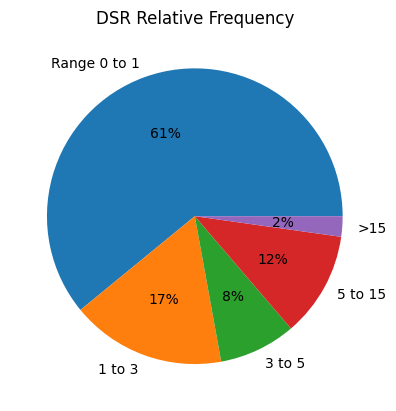

In [26]:
# Distributions of the DSR data
plt.pie (relative_frequency, labels=['Range 0 to 1','1 to 3','3 to 5','5 to 15','>15'], autopct='%1.0f%%')
plt.title('DSR Relative Frequency')
plt.show()

Note. Each DSR range depends in the following:

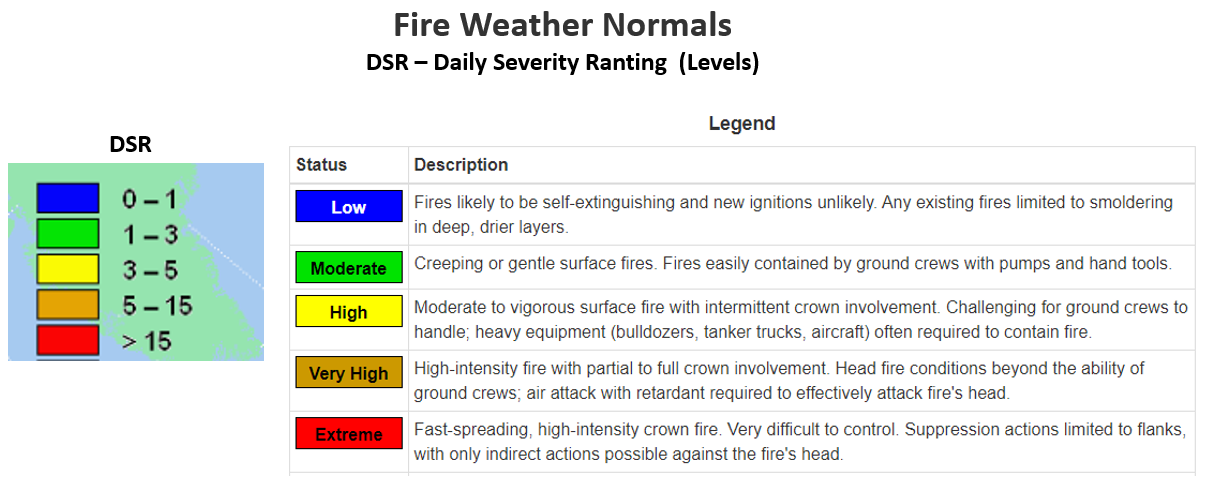

FWI Frequency Distribution by Fire Weather Index

In [27]:
# Converting the DataFrame into Series or one dimensional
Series = mb_data['FWI']

#Defining bins for DSR depending on ranges for Canada Wildfire System
bins = [0, 5, 10, 20, 30, mb_data['FWI'].max()]

# adding a new column to the DataFrame representing time categories
categories = pd.cut(Series, bins, include_lowest = True, right=False)

# Create the frequency table for DSR
frequency_table= pd.Series(categories).value_counts().sort_index()

# #Calculation of relative frequency
relative_frequency = frequency_table/ len(categories)

# #combining frequency and relative frequency in a new DataFrame
frq_distribution = pd.DataFrame({'Frequency': frequency_table, "Relative Frequency": relative_frequency})
print("\nFrequency Table:")
print(frq_distribution)


Frequency Table:
               Frequency  Relative Frequency
FWI                                         
[0.0, 5.0)        100354            0.526635
[5.0, 10.0)        29240            0.153445
[10.0, 20.0)       37485            0.196713
[20.0, 30.0)       15723            0.082511
[30.0, 133.2)       7749            0.040665


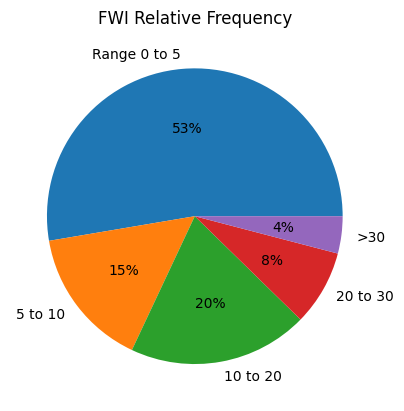

In [28]:
# Distributions of the FWI data
plt.pie (relative_frequency, labels=['Range 0 to 5','5 to 10','10 to 20','20 to 30','>30'], autopct='%1.0f%%')
plt.title('FWI Relative Frequency')
plt.show()

Note. Each FWI range depends in the following:

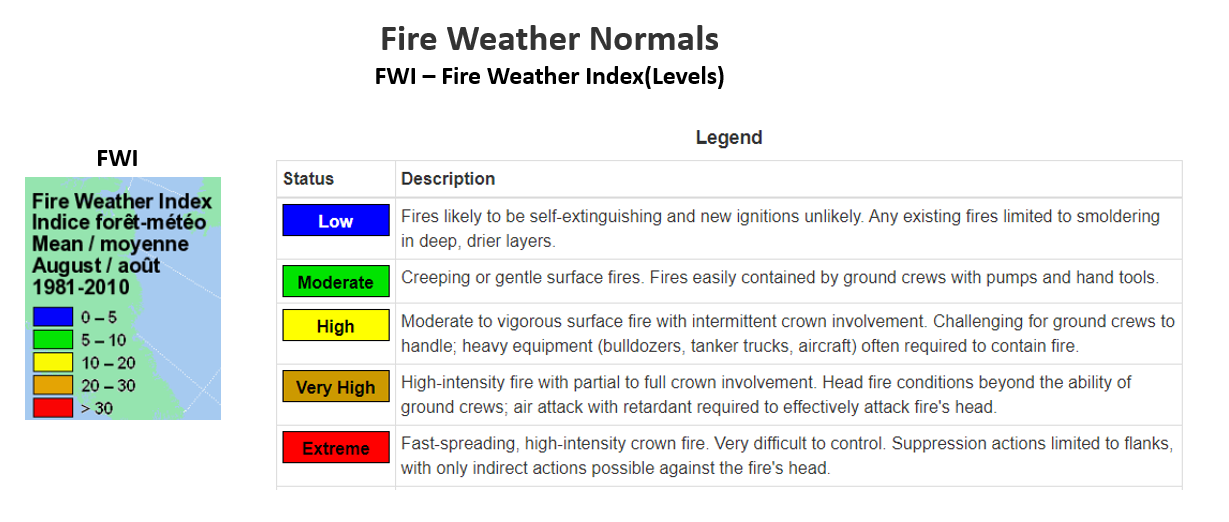

Adding FWI_Levels Column for Classification

In [29]:
# Define the bins and labels for the classification according to the FWI levels defined in Canada Website
bins = [-np.inf, 5, 10, 20, 30, np.inf]
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']

# Create a new column with the categorized FWI
mb_data['FWI_Levels'] = pd.cut(mb_data['FWI'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new target class
mb_data.head()

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date,FWI_Levels
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02,Low
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02,Low
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02,Moderate
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02,Low
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02,Low


In [30]:
# Frequency table - FWI_Levels
freq_Ctable = mb_data["FWI_Levels"].value_counts()
freq_Ctable = pd.DataFrame({"Classes": freq_Ctable.keys(), 'frequency': freq_Ctable.values})
freq_Ctable = freq_Ctable.sort_values(by="Classes")
freq_Ctable['Relative_Frequency']=freq_Ctable['frequency']/freq_Ctable['frequency'].sum()
freq_Ctable

,Classes,frequency,Relative_Frequency
0,Low,101005,0.530051
2,Moderate,29109,0.152757
1,High,37196,0.195196
3,Very High,15581,0.081766
4,Extreme,7666,0.040229


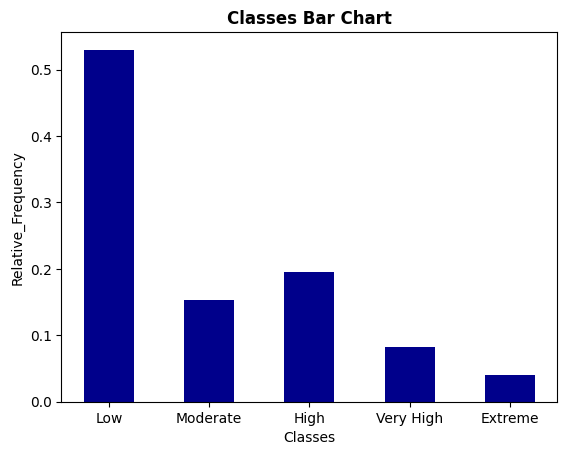

In [31]:
# Creating the bar chart for Classes variable
plt.bar(freq_Ctable.Classes,freq_Ctable.Relative_Frequency, color="darkblue", width = 0.5 )

#Adding the labels to the bar chart
plt.xlabel('Classes')
plt.ylabel('Relative_Frequency')
plt.title('Classes Bar Chart', fontweight = 'bold')
plt.show()

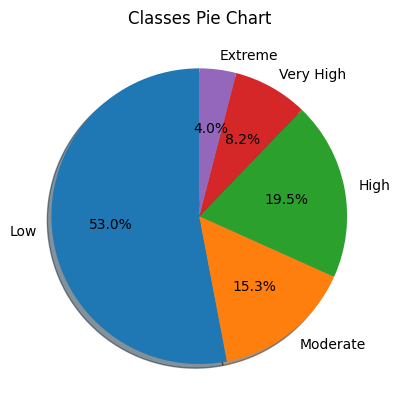

In [32]:
# Creating the pie chart for Classes variable:

plt.pie(freq_Ctable['Relative_Frequency'], labels = freq_Ctable['Classes'],
        autopct='%1.1f%%', startangle =90, shadow=True)
plt.title('Classes Pie Chart')
plt.show()

###### Note. the distributions shows 53 % Low Fire which means not fire, and 47% for Fire (different levels)

Data Distribution Continuous Weather Features with Target

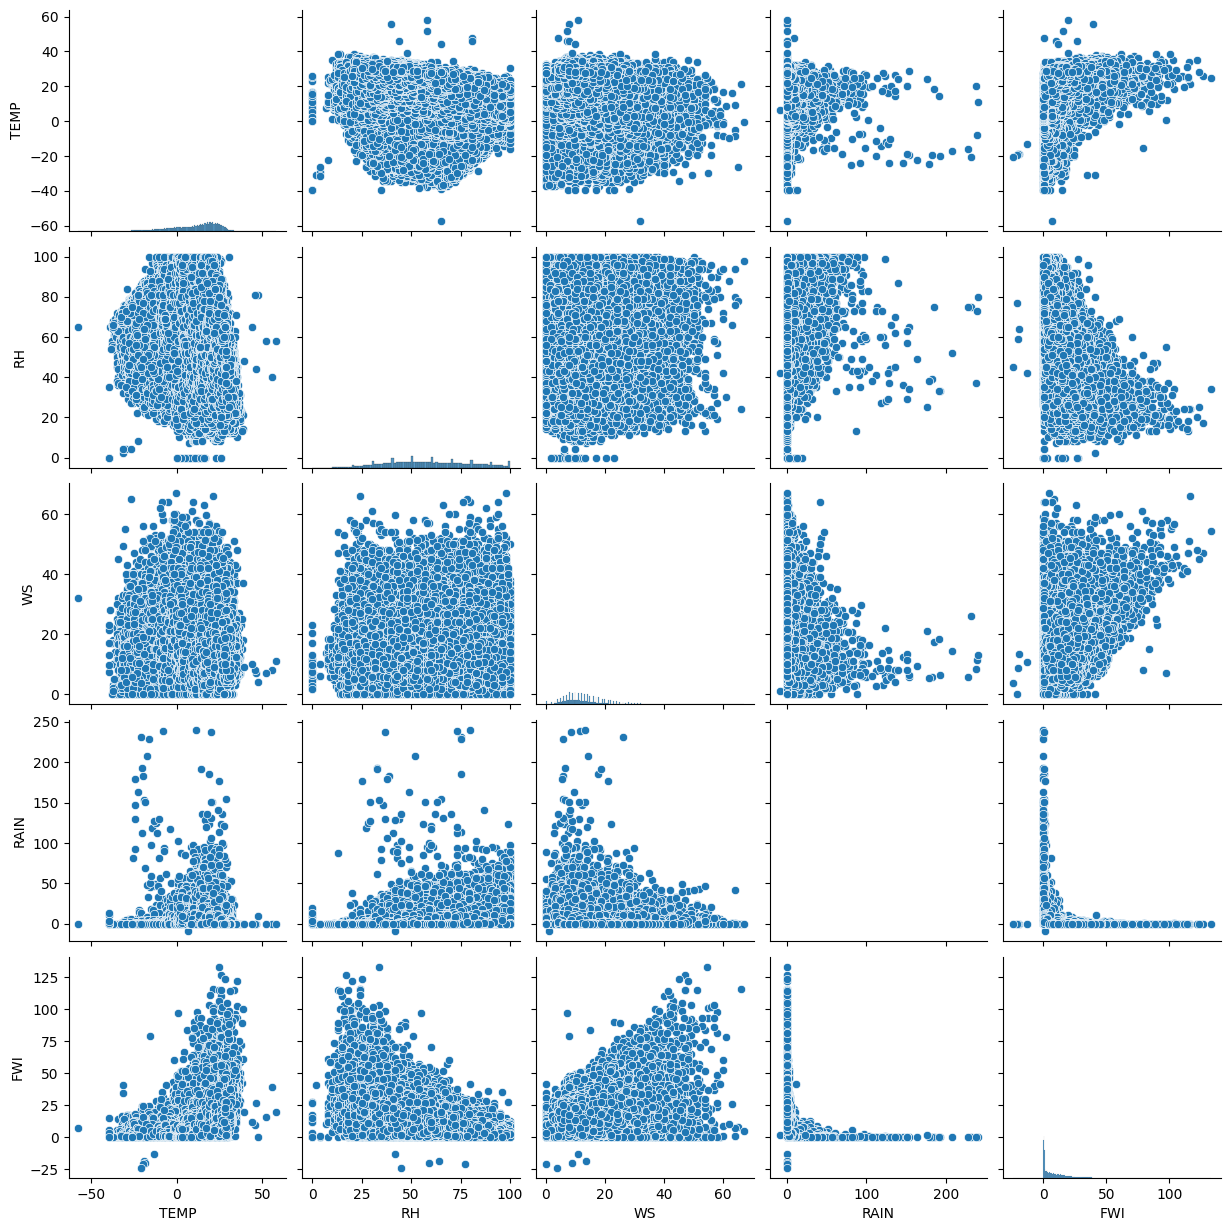

In [33]:
#Correlation distribution first four features with relation to FWI
sns.pairplot(data = mb_data, vars=['TEMP','RH','WS','RAIN','FWI']) 
plt.show()

FWI Distribution

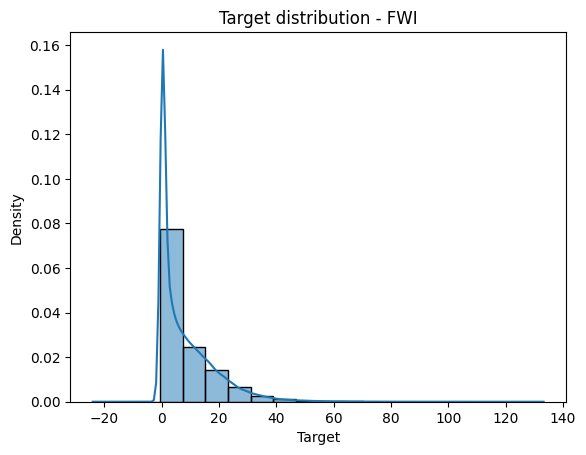

In [34]:
sns.histplot(mb_data['FWI'], bins=20, kde=True, stat="density")
#plt.ylabel("Frequency")
plt.xlabel("Target")
plt.title("Target distribution - FWI")
plt.show()

Data Distribution by Date

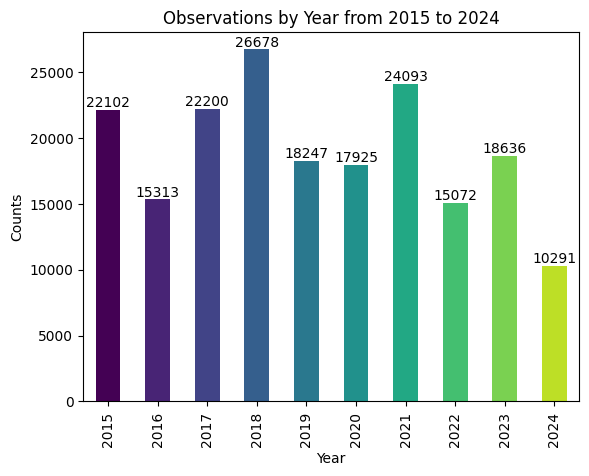

In [35]:
#Number weather observations over time per year
years = mb_data['Date'].dt.year
# Count the occurrences of each year and sort by year
year_counts = years.value_counts().sort_index()

# Define the colors
colormap = plt.colormaps.get_cmap('viridis')

# Assign a different color to each bar
colors = [colormap(i / len(year_counts)) for i in range(len(year_counts))]

# Plot the bar graph
plt.figure()
ax = year_counts.plot.bar(color=colors[:len(year_counts)])
# Add labels on the bars
for i, count in enumerate(year_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Observations by Year from 2015 to 2024')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

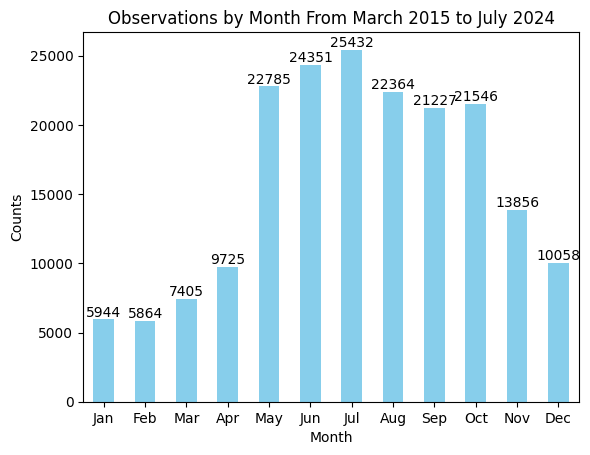

In [36]:
#Number observations over time per Month

# Extract the month from the 'Date' column
mb_data['Month'] = mb_data['Date'].dt.month

# Count the occurrences of each month
month_counts = mb_data['Month'].value_counts().sort_index()
# Define the month labels in order
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the bar graph
plt.figure()
ax = month_counts.plot(kind='bar', color='skyblue')
ax.set_xticklabels(month_labels, rotation=0)

# Add labels on the bars
for i, count in enumerate(month_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Observations by Month From March 2015 to July 2024')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=0)  #month labels are horizontal
plt.show()

### Feature Selection - Evaluation and Analysis 

Data Preparation for Feature Selection Analysis

Split Train-Test

In [20]:
from sklearn.model_selection import train_test_split
random_state = 42
X1= mb_data[["TEMP","RH","WD","WS","RAIN","FFMC","DMC","DC","ISI","BUI","DSR"]]
y1= mb_data["FWI"]

# split the data
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X1, y1, test_size=0.3, random_state=random_state)

Normalizing Data

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_fs = scaler.fit_transform(X_train_fs)

X_test_fs = scaler.transform(X_test_fs)

Correlation Matrix Analysis (Relation with Target)

In [24]:
# Find and list the top features with the strongest correlation to the target FWI
top_correlated_features = corr_matrix['FWI'].abs().sort_values(ascending=False).index[1:12].tolist()
top_correlated_features

['DSR', 'ISI', 'DMC', 'BUI', 'RH', 'FFMC', 'TEMP', 'WS', 'DC', 'RAIN', 'WD']

In [25]:
# Find and list the top features with the strongest correlation to the target DSR
top_correlated_features = corr_matrix['DSR'].abs().sort_values(ascending=False).index[1:12].tolist()
top_correlated_features

['FWI', 'ISI', 'DMC', 'BUI', 'RH', 'FFMC', 'TEMP', 'WS', 'DC', 'RAIN', 'WD']

Univariate Feature Selection - SelectKbest (Relation with Target)

In [ ]:
# Target FWI
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest with f_regression
k_best = SelectKBest(score_func=f_regression, k='all')
X_new = k_best.fit_transform(X1, y1)

# Get scores
scores = k_best.scores_
feature_scores = pd.DataFrame({'Feature': X1.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

   Feature          Score
10     DSR  892575.953824
8      ISI  835791.482087
6      DMC  228587.144767
9      BUI  203604.701872
1       RH   96796.515230
5     FFMC   88500.968628
0     TEMP   63154.041851
3       WS   27748.048547
7       DC   14256.251773
4     RAIN    9025.697363
2       WD      36.102780


In [ ]:
# Target DSR
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest with f_regression
k_best = SelectKBest(score_func=f_regression, k='all')
X_new = k_best.fit_transform(mb_data[["TEMP","RH","WD","WS","RAIN","FFMC","DMC","DC","ISI","BUI","FWI"]], 
                             mb_data["DSR"])

# Get scores
scores = k_best.scores_
feature_scores = pd.DataFrame({'Feature': mb_data[["TEMP","RH","WD","WS","RAIN","FFMC","DMC","DC","ISI","BUI","FWI"]].columns, 
                               'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

   Feature          Score
10     FWI  892575.953824
8      ISI  606737.848992
6      DMC  110499.154268
9      BUI   95515.941741
1       RH   44865.238801
5     FFMC   29600.812350
0     TEMP   28195.187854
3       WS   26521.297121
7       DC    9343.217584
4     RAIN    3297.947430
2       WD      82.432562


Note. the best results are with FWI as target, so the Target for this project is FWI as initial plan

Sequential Feature Selection

In [ ]:
# Using FWI as target
# Get the list of all column names from headers 
feature_names = X1.columns.tolist()

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

# nearset neighbors 
knn = KNeighborsRegressor(n_neighbors=5)

# Forward selection
tic =time.time()
sfs = SequentialFeatureSelector(knn, n_features_to_select=10, direction='forward')
sfs.fit(X_train_fs, y_train_fs)
toc= time.time()
features = sfs.get_support()

features = [feature for feature, selected in zip(feature_names, features) if selected]

print("KNN Regressor")
print(f"Top 10 features:{features}")
print(f"Forward selection took {toc-tic} seconds")

KNN Regressor
Top 10 features:['TEMP', 'RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'DSR']
Forward selection took 420.764417886734 seconds


Automated Selection of Best Number of Features

In [ ]:
# Using FWI as target
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

# Model to use for RFECV
model = LinearRegression()

# Initialize RFECV with model and cross-validation strategy
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X1, y1)

# Get selected features and optimal number of features
optimal_num_features = rfecv.n_features_
selected_features = X1.columns[rfecv.support_]
print("Optimal number of features:", optimal_num_features)
print("Selected features:", selected_features)

Optimal number of features: 8
Selected features: Index(['TEMP', 'RH', 'WS', 'FFMC', 'DMC', 'ISI', 'BUI', 'DSR'], dtype='object')


Note. Using domain knowledge, matrix correlation analysis and evaluating other feature selection techniques, the following will be included in the model development. "TEMP","RH","WS","RAIN","FFMC","DMC","ISI","BUI","DSR" with FWI as Response Variable

Statistics Analysis Simple Linear Regression By Feature vs Target

In [ ]:
# Checking linear Correlation of FWI with each Descriptive Feature
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

descriptive_features = ["TEMP","RH","WS","RAIN","FFMC","DMC","DC","ISI","BUI","DSR"]
response_variable = 'FWI'

def apply_simple_regression(mb_data, x_name, y_name):
    # Get the descriptive feature and response variable
    x = mb_data[x_name]
    y = mb_data[y_name]

    # Fit the simple regression model
    model = sm.OLS(y, sm.add_constant(x))
    result = model.fit()

    # Print the summary statistics of the model
    print(f"Summary Statistics for {x_name}:")
    print(result.summary())
    print("-----------------------")
    
     # Visualize the relationship between x and y
    plt.scatter(x, y, marker='o', color='black')
    plt.plot(x, result.fittedvalues, color='red', linewidth=2)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f"Relationship between {y_name} and {x_name}")
    plt.legend({x_name})
    plt.show()

Summary Statistics for TEMP:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                 6.315e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:32   Log-Likelihood:            -6.8388e+05
No. Observations:              190557   AIC:                         1.368e+06
Df Residuals:                  190555   BIC:                         1.368e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0371  

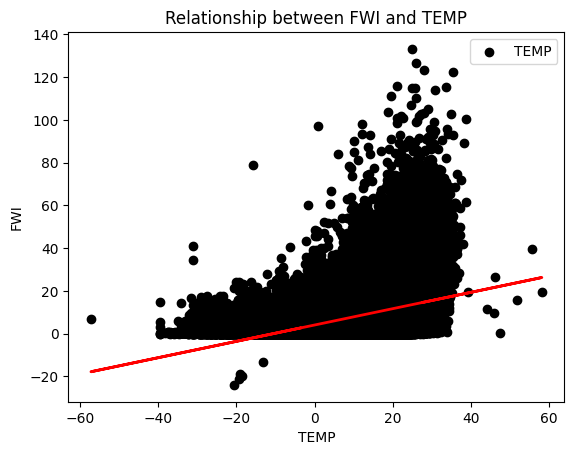

Summary Statistics for RH:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 9.680e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:34   Log-Likelihood:            -6.7202e+05
No. Observations:              190557   AIC:                         1.344e+06
Df Residuals:                  190555   BIC:                         1.344e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2054    

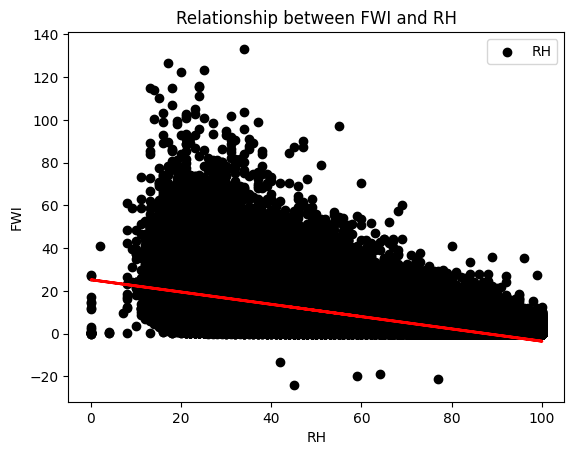

Summary Statistics for WS:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                 2.775e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:36   Log-Likelihood:            -6.9820e+05
No. Observations:              190557   AIC:                         1.396e+06
Df Residuals:                  190555   BIC:                         1.396e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5977    

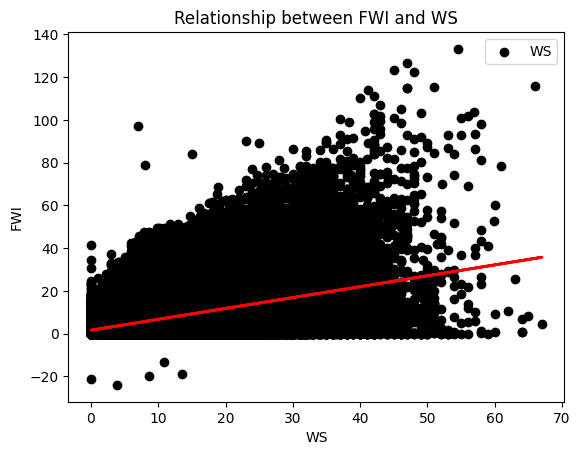

Summary Statistics for RAIN:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     9026.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:39   Log-Likelihood:            -7.0675e+05
No. Observations:              190557   AIC:                         1.413e+06
Df Residuals:                  190555   BIC:                         1.414e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8260  

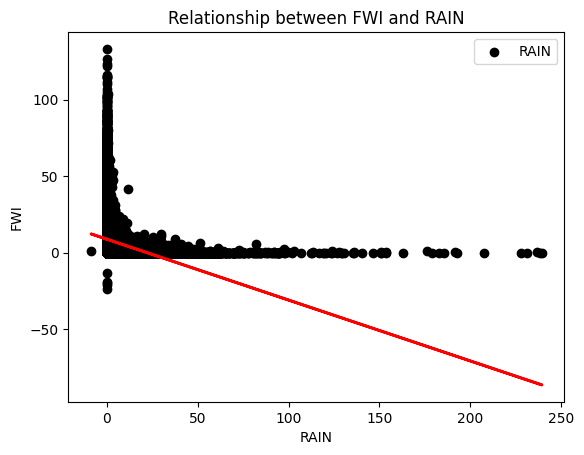

Summary Statistics for FFMC:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                 8.850e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:            -6.7481e+05
No. Observations:              190557   AIC:                         1.350e+06
Df Residuals:                  190555   BIC:                         1.350e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.6796  

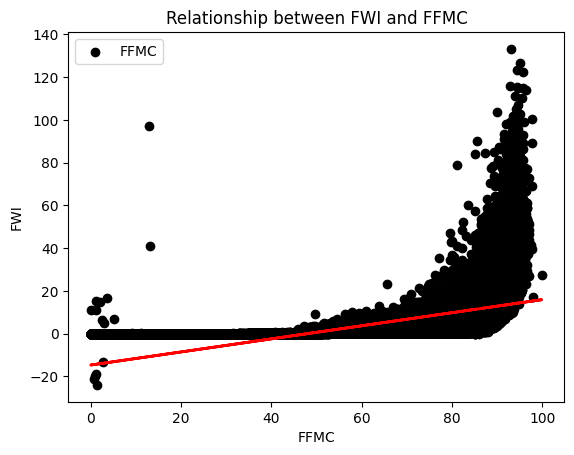

Summary Statistics for DMC:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                 2.286e+05
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:43   Log-Likelihood:            -6.3605e+05
No. Observations:              190557   AIC:                         1.272e+06
Df Residuals:                  190555   BIC:                         1.272e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5788   

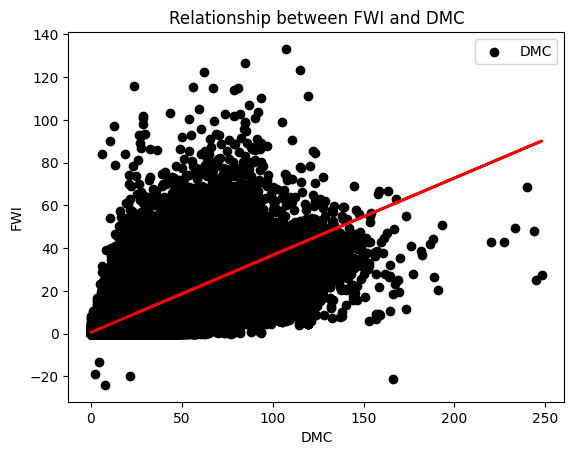

Summary Statistics for DC:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                 1.426e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:45   Log-Likelihood:            -7.0428e+05
No. Observations:              190557   AIC:                         1.409e+06
Df Residuals:                  190555   BIC:                         1.409e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6900    

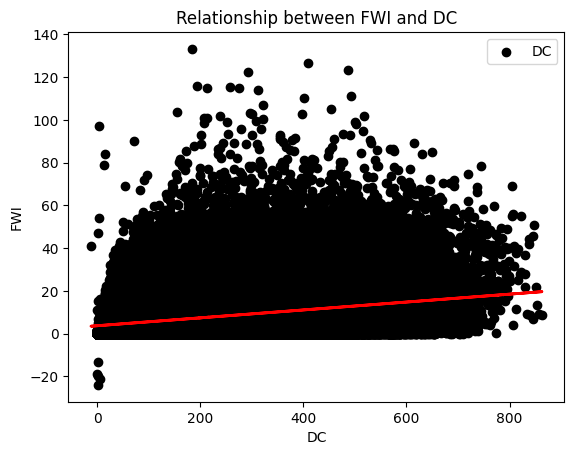

Summary Statistics for ISI:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 8.358e+05
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:47   Log-Likelihood:            -5.5072e+05
No. Observations:              190557   AIC:                         1.101e+06
Df Residuals:                  190555   BIC:                         1.101e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4555   

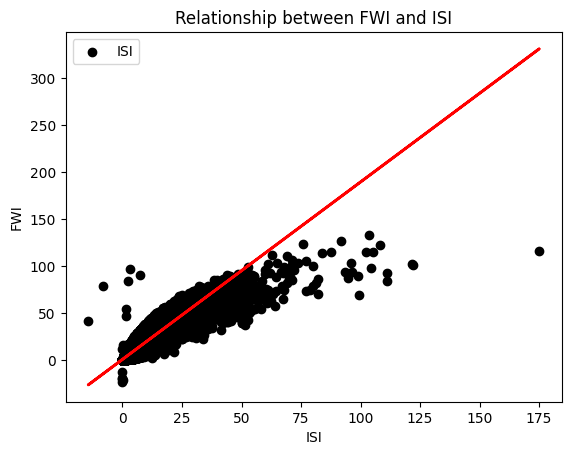

Summary Statistics for BUI:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                 2.036e+05
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:50   Log-Likelihood:            -6.4191e+05
No. Observations:              190557   AIC:                         1.284e+06
Df Residuals:                  190555   BIC:                         1.284e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1100   

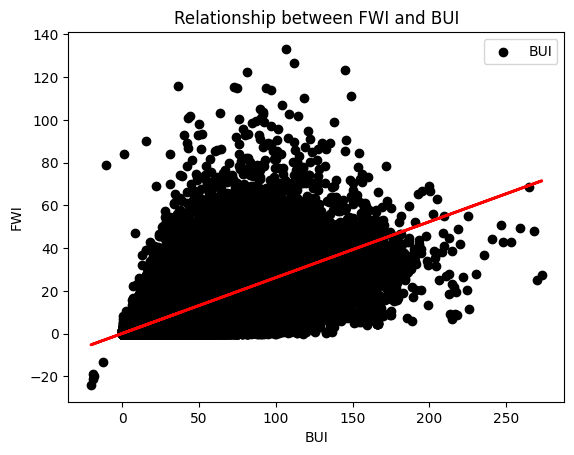

Summary Statistics for DSR:
                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 8.926e+05
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:37:52   Log-Likelihood:            -5.4559e+05
No. Observations:              190557   AIC:                         1.091e+06
Df Residuals:                  190555   BIC:                         1.091e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9210   

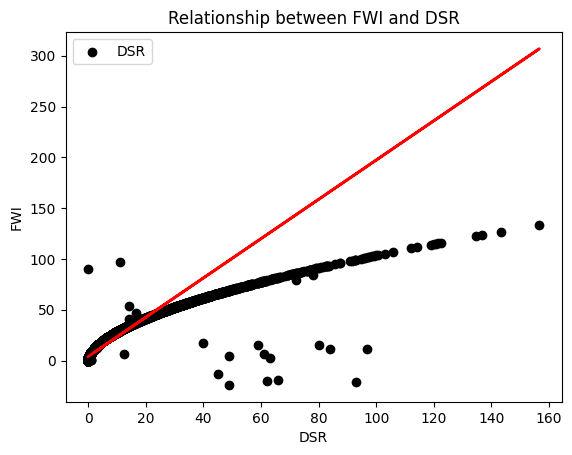

In [ ]:
for feature in descriptive_features:
    apply_simple_regression(mb_data, feature, response_variable)

##### Interpretation Simple Linear Regression - Feature Selection with Null Hipotesis

- Description of Simple Linear Regression Results:

Analizying the results of each feature, and looking to predict which feature could be removed by the null hypothesis H0 >= 0.05, all the features are rejecting the null hipotesis, meaning that all 10 features will be included in the model.
However the R^2 scores shows that DC and Rain has small score, meaning that these two features have less explanation over the target feature.

In [ ]:
mb_data_1 = mb_data.drop(columns=["STATION","Date","Month", "FWI_Levels"])

In [ ]:
# Applying Lasso Regression per feature to evaluate relation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
#Removing name as a descriptive feature that containts text and is not functional for the model
if 'name' in mb_data_1:
    auto = mb_data_1.drop(columns='name')

#Defining the function to evaluate all features with regularization alpha=0.1
def lasso_regression_per_feature(auto, target_column, alpha=0.1):
    # Loop through each feature in the DataFrame
    for feature_name in auto.columns.drop(target_column):
        print(f"\nProcessing feature: {feature_name}")

        # Features and target variable
        X = mb_data_1[[feature_name]]
        y = mb_data_1[target_column]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Ensure y_train and y_test are 1D arrays
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()

        # Normalization
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Create and train the Lasso model 
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train, y_train)

        # Make predictions
        y_pred = lasso_model.predict(X_test)

        # Evaluate the model to square the weights
        mean_sq = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Lasso model summary
        print("\nLasso Regression Summary:")
        print(f"Mean Squared Error: {mean_sq:.2f}")
        print(f"R^2 Score: {r2:.2f}")
        print(f"Intercept: {lasso_model.intercept_}")
        print("Coefficients:")
        coefficients = pd.DataFrame({'Feature': [feature_name], 'Coefficient': lasso_model.coef_})
        print(coefficients)

        # Plot the results
        plt.figure(figsize=(6, 4))
        plt.scatter(X_test, y_test, color='black', label='Test data')
        plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Lasso regression line')
        plt.xlabel(feature_name)
        plt.ylabel(target_column)
        plt.title(f'Lasso Regression using {feature_name}')
        plt.legend()
        plt.show()


Processing feature: TEMP

Lasso Regression Summary:
Mean Squared Error: 77.31
R^2 Score: 0.24
Intercept: -13.29091818594766
Coefficients:
  Feature  Coefficient
0    TEMP    36.366861


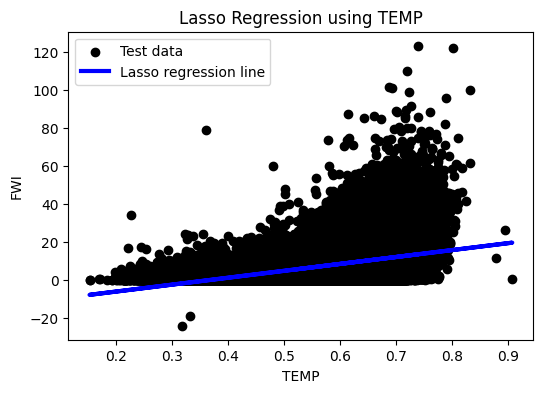


Processing feature: RH

Lasso Regression Summary:
Mean Squared Error: 67.74
R^2 Score: 0.34
Intercept: 23.74666677405491
Coefficients:
  Feature  Coefficient
0      RH   -26.300683


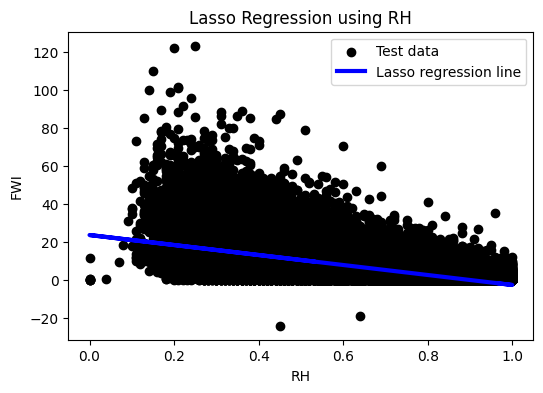


Processing feature: WD

Lasso Regression Summary:
Mean Squared Error: 102.15
R^2 Score: -0.00
Intercept: 8.176294746943153
Coefficients:
  Feature  Coefficient
0      WD          0.0


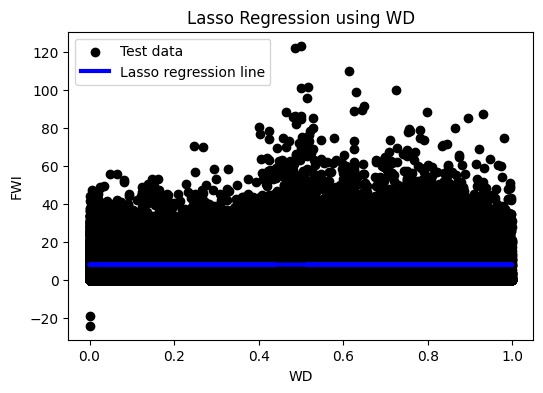


Processing feature: WS

Lasso Regression Summary:
Mean Squared Error: 90.24
R^2 Score: 0.12
Intercept: 3.2895799755750366
Coefficients:
  Feature  Coefficient
0      WS    25.337901


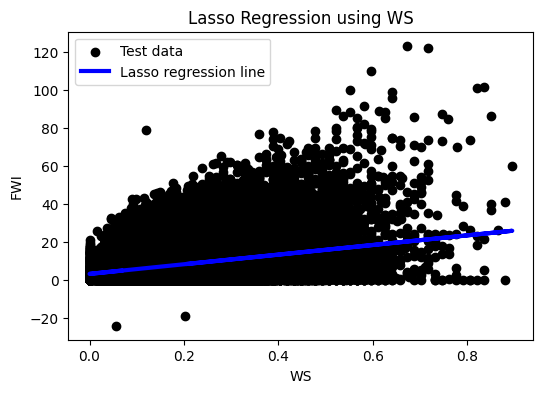


Processing feature: RAIN

Lasso Regression Summary:
Mean Squared Error: 102.15
R^2 Score: -0.00
Intercept: 8.176294746943153
Coefficients:
  Feature  Coefficient
0    RAIN         -0.0


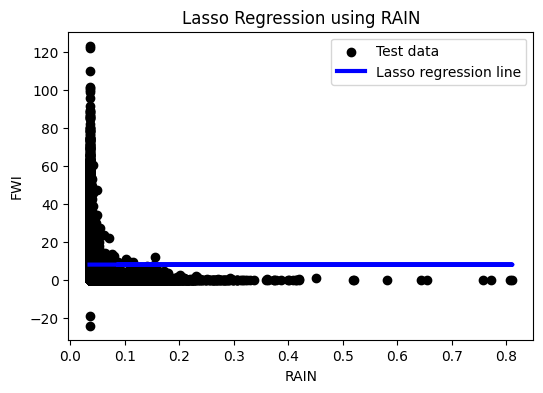


Processing feature: FFMC

Lasso Regression Summary:
Mean Squared Error: 69.90
R^2 Score: 0.32
Intercept: -12.514756630235194
Coefficients:
  Feature  Coefficient
0    FFMC    27.655239


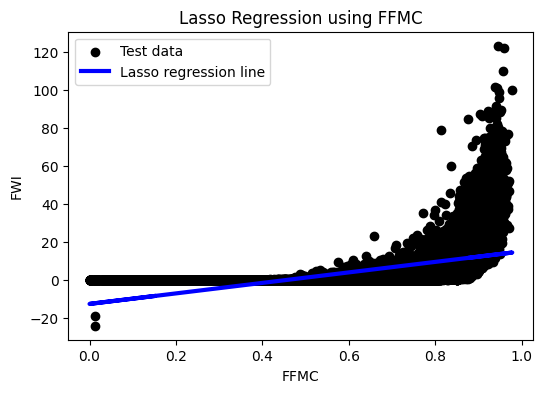


Processing feature: DMC

Lasso Regression Summary:
Mean Squared Error: 47.89
R^2 Score: 0.53
Intercept: 1.7817202943218593
Coefficients:
  Feature  Coefficient
0     DMC    75.343844


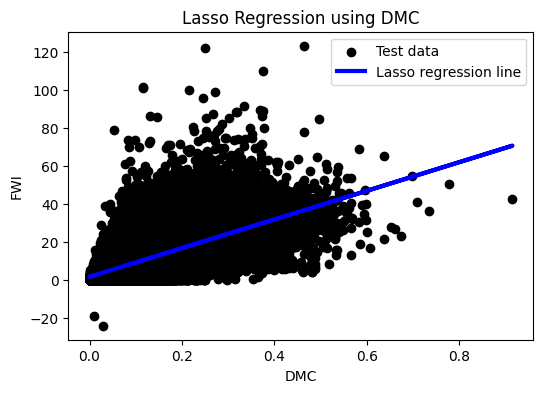


Processing feature: DC

Lasso Regression Summary:
Mean Squared Error: 95.35
R^2 Score: 0.07
Intercept: 4.5479234241910405
Coefficients:
  Feature  Coefficient
0      DC    12.433128


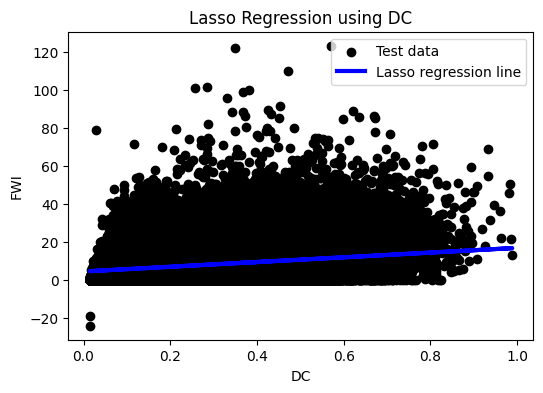


Processing feature: ISI

Lasso Regression Summary:
Mean Squared Error: 34.48
R^2 Score: 0.66
Intercept: -11.72624227030315
Coefficients:
  Feature  Coefficient
0     ISI    203.93085


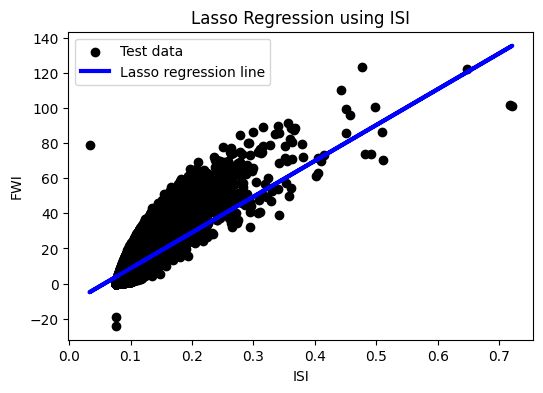


Processing feature: BUI

Lasso Regression Summary:
Mean Squared Error: 50.44
R^2 Score: 0.51
Intercept: -3.0609927534883354
Coefficients:
  Feature  Coefficient
0     BUI    65.508001


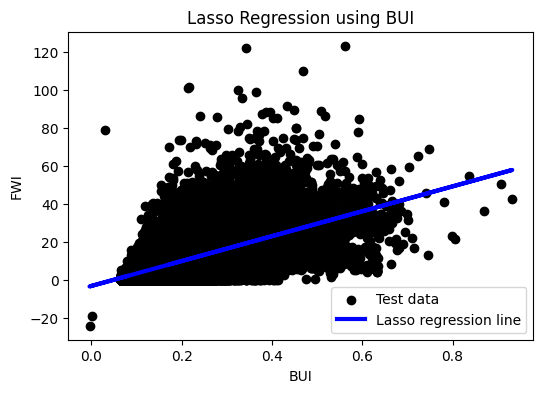


Processing feature: DSR

Lasso Regression Summary:
Mean Squared Error: 28.82
R^2 Score: 0.72
Intercept: 5.462864164322218
Coefficients:
  Feature  Coefficient
0     DSR   192.755429


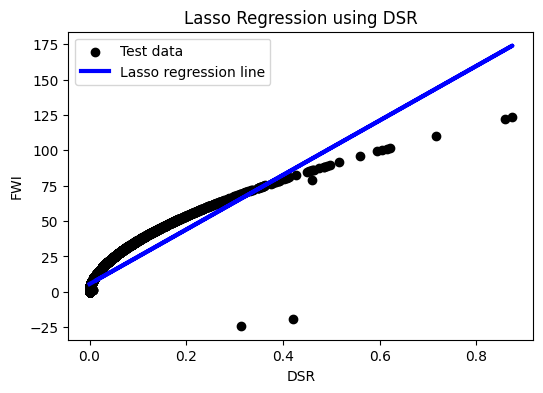

In [ ]:
# Run Lasso regression per feature
lasso_regression_per_feature(mb_data_1,'FWI', alpha=0.1)

Note. Lasso Results also show low R^2 score for WD, and DC, which could be removed from the model, and DSR is removed since its highly correlated to the target and could cause the models to rely only in this feature.

Conclusion, for feature selection its confirmed trough all analysis to use the following features:
 * TEMP + RH + WS + RAIN + FFMC + DMC + ISI + BUI '

### Data Preparation for Modeling - Regression - Quantitative or Continuos Data

Handling Outliers - Tightened

In [20]:
# # # Define function to clip outliers in all numerical columns
# def clip_outliers(mb_data, lower_quantile=0.05, upper_quantile=0.95):
#     mb_data = mb_data.copy()
#     for col in mb_data.select_dtypes(include=[np.number]).columns:
#         lower_bound = mb_data[col].quantile(lower_quantile)
#         upper_bound = mb_data[col].quantile(upper_quantile)
#         mb_data[col] = mb_data[col].clip(lower_bound, upper_bound)
#     return mb_data

# # Apply clipping to the dataset
# mb_data = clip_outliers(mb_data)

# # Display some of the original and clipped data for comparison
# print(f"Original number of rows: {len(mb_data)}")
# print(f"Number of rows after outlier removal: {len(mb_data)}")

Split Data

In [21]:
from sklearn.model_selection import train_test_split
random_state = 42
X= mb_data[["TEMP","RH","WS","RAIN", "FFMC","DMC","ISI","BUI"]]
y= mb_data["FWI"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

Scale Data

In [22]:
# Scale the data - Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Model Development and Statistic Evaluation - Regression

Ensemble Models: Random Forest Regressor and Gradient Boosting Regressor

In [23]:
# Build the Random Forest Regressor Model - Initialize
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42) # random forest regressor
start_time = time.time()
rf.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Make prediction for Random Forest regression
start_time = time.time()
rf_pred = rf.predict(X_test)
rf_testing_time = time.time() - start_time

# Calculate regression metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)


print("Regression Metrics for Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Training time: {rf_training_time:.2f}")
print(f"Testing time: {rf_testing_time:.2f}")

Regression Metrics for Random Forest Regressor:
Mean Squared Error (MSE): 0.21
R-squared (R²): 1.00
Root Mean Squared Error (RMSE): 0.46
Mean Absolute Error (MAE): 0.06
Training time: 80.90
Testing time: 1.47


In [24]:
# Build the Gradient Boosting Regressor Model - Initialize
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_depth=8,
                               min_samples_split=4,min_samples_leaf=1,
                               subsample=0.8,n_iter_no_change=10, #early stopping - preventing overfitting
                               validation_fraction=0.1,random_state=42) #Gradient boosting regressor
start_time = time.time()
gb.fit(X_train, y_train)
gb_training_time = time.time() - start_time

gb_train_acc = round(gb.score(X_train, y_train), 3)
gb_test_acc = round(gb.score(X_test, y_test), 3)

# Make prediction for gradient boosting regression
start_time = time.time()
gb_pred = gb.predict(X_test)
gb_testing_time = time.time() - start_time

# Calculate regression metrics
b_mse = mean_squared_error(y_test, gb_pred)
b_r2 = r2_score(y_test, gb_pred)
b_rmse = np.sqrt(b_mse)
b_mae = mean_absolute_error(y_test, gb_pred)


print("Regression Metrics for Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {b_mse:.2f}")
print(f"R-squared (R²): {b_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {b_mse:.2f}")
print(f"Mean Absolute Error (MAE): {b_mae:.2f}")
print(f"Training time: {gb_training_time:.2f}")
print(f"Testing time: {gb_testing_time:.2f}")

Regression Metrics for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.22
R-squared (R²): 1.00
Root Mean Squared Error (RMSE): 0.22
Mean Absolute Error (MAE): 0.07
Training time: 63.21
Testing time: 0.49


Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
dt_training_time = time.time() - start_time

dt_train_acc = round(dt.score(X_train, y_train), 3)
dt_test_acc = round(dt.score(X_test, y_test), 3)

# Make prediction for Decision Tree regression
start_time = time.time()
tree_pred = dt.predict(X_test)
tree_testing_time = time.time() - start_time

# Calculate regression metrics
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, tree_pred)


print("Regression Metrics for Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {tree_mse:.2f}")
print(f"R-squared (R²): {tree_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {tree_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {tree_mae:.2f}")
print(f"Training time: {dt_training_time:.2f}")
print(f"Testing time: {tree_testing_time:.2f}")

Regression Metrics for Decision Tree Regressor:
Mean Squared Error (MSE): 0.45
R-squared (R²): 1.00
Root Mean Squared Error (RMSE): 0.67
Mean Absolute Error (MAE): 0.09
Training time: 1.04
Testing time: 0.02


KNN Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
start_time = time.time()
knn.fit(X_train, y_train)
knn_training_time = time.time() - start_time
knn_train_acc = round(knn.score(X_train, y_train), 3)
knn_test_acc = round(knn.score(X_test, y_test), 3)

# Make prediction for KNN regression
start_time = time.time()
knn_pred = knn.predict(X_test)
knn_testing_time = time.time() - start_time

# Calculate regression metrics
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_pred)


print("Regression Metrics for KNN Regressor:")
print(f"Mean Squared Error (MSE): {knn_mse:.2f}")
print(f"R-squared (R²): {knn_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {knn_mse:.2f}")
print(f"Mean Absolute Error (MAE): {knn_mae:.2f}")
print(f"Training time: {knn_training_time:.2f}")
print(f"Testing time: {knn_testing_time:.2f}")

Regression Metrics for KNN Regressor:
Mean Squared Error (MSE): 1.15
R-squared (R²): 0.99
Root Mean Squared Error (RMSE): 1.15
Mean Absolute Error (MAE): 0.54
Training time: 0.54
Testing time: 4.07


Multivariable Regression

In [27]:
#Modeling Multivariable Regression
import statsmodels.formula.api as sm
start_time = time.time()
model_all = sm.ols('FWI ~ TEMP + RH + WS + RAIN + FFMC + DMC + ISI + BUI ', mb_data).fit()
mr_training_time = time.time() - start_time
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 4.542e+05
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:28:23   Log-Likelihood:            -4.2540e+05
No. Observations:              190557   AIC:                         8.508e+05
Df Residuals:                  190548   BIC:                         8.509e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3007      0.051     -5.949      0.0

In [28]:
# Calculate MULTIVARIABLE regression statistic metrics

# Make predictions for Multivariable Linear Regression
start_time = time.time()
y_pred_mr = model_all.predict(mb_data)
mr_testing_time = time.time() - start_time

# Evaluate the model
# Calculate MAE
mr_mae = mean_absolute_error(y, y_pred_mr)
# Calculate R2 score
mr_r2 = model_all.rsquared
# Calculate MSE
mr_mse = mean_squared_error(y, y_pred_mr)
# Calculate RMSE
mr_rmse = np.sqrt(mean_squared_error(y, y_pred_mr))


print("Regression Metrics for Multivariable Regression:")
print(f"Mean Squared Error (MSE): {mr_mse:.2f}")
print(f"R-squared (R²): {mr_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {mr_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mr_mae:.2f}")
print(f"training time:{mr_training_time:.2f}")
print(f"Testing time: {mr_testing_time:.2f}")

Regression Metrics for Multivariable Regression:
Mean Squared Error (MSE): 5.09
R-squared (R²): 0.95
Root Mean Squared Error (RMSE): 2.26
Mean Absolute Error (MAE): 1.39
training time:0.22
Testing time: 0.09


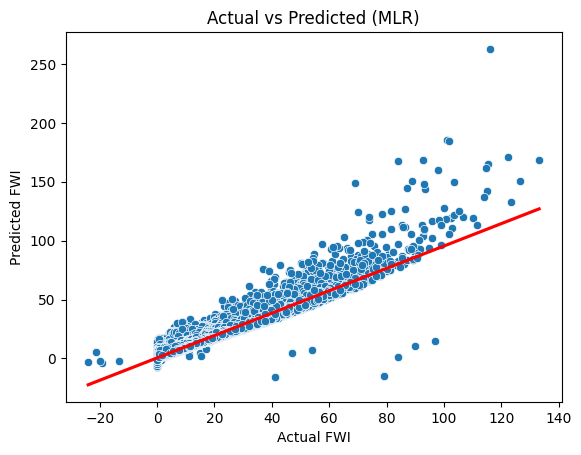

In [29]:
# MLR 2 - Visualization Plot - Multivariable Regression
sns.scatterplot(x=y, y=y_pred_mr)
sns.regplot(x=y, y=y_pred_mr, scatter=False, color='r')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted (MLR)')
plt.show()

###### Note. This graph shows the prediction versus the test data during the execution of the test model, it is showing the statistically significant relationship between the variables, which means that the model provides unbiased fit to the data, and p-values indicate that both (features and target) are linear and squared terms are statistically significant but there are some outliers and variance between the errors.

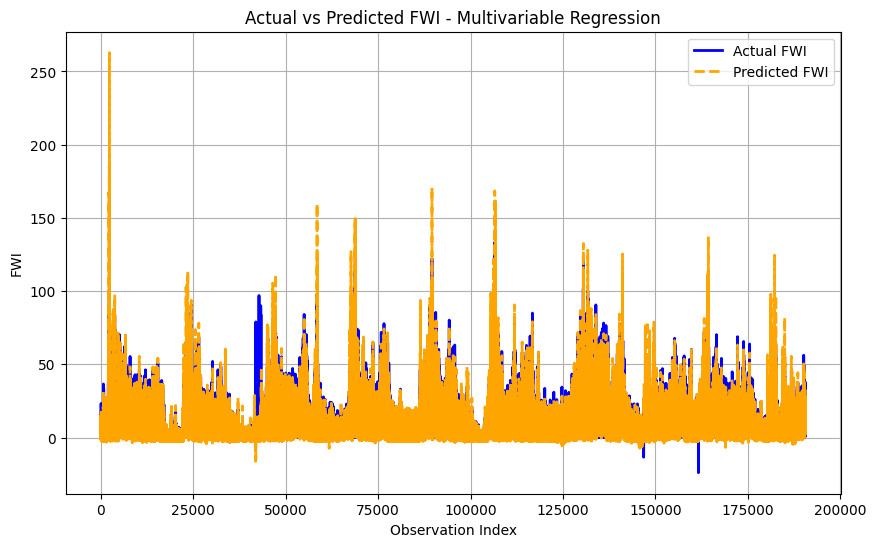

In [30]:
# Actual values
y_actual_mr = mb_data['FWI']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_actual_mr)), y_actual_mr, label='Actual FWI', color='blue', linewidth=2)
plt.plot(np.arange(len(y_pred_mr)), y_pred_mr, label='Predicted FWI', color='orange', linewidth=2, linestyle='--')

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('FWI')
plt.title('Actual vs Predicted FWI - Multivariable Regression')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#saving results in data frame for Multivariable regression model
results_df = pd.DataFrame({
    'Date': mb_data['Date'],        
    'Actual_FWI': y_actual_mr,
    'Predicted_FWI': y_pred_mr
})
results_df.to_csv('FWI_Actual_vs_Predicted_Multivariable_Regression.csv', index=False)

Polynomial Regression

Regression Metrics for Polynomial Regression:
Polynomial Regression (degree=2) MSE: 0.5843
Polynomial Regression (degree=2) R-squared (R²): 0.9943
Root Mean Squared Error (RMSE): 0.76
Mean Absolute Error (MAE): 0.41
training time: 0.81
Testing time: 0.02


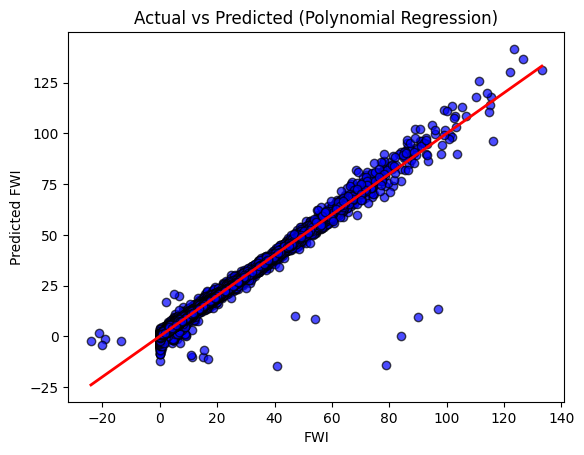

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
start_time = time.time()
X_poly = poly.fit_transform(X)

# Fit a linear regression model with the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_training_time = time.time() - start_time

start_time = time.time()
y_pred_pol = poly_model.predict(X_poly)
poly_testing_time = time.time() - start_time

# Evaluate the model
poly_mse = mean_squared_error(y, y_pred_pol)
poly_r2 = r2_score(y, y_pred_pol)
poly_rmse = np.sqrt(mean_squared_error(y, y_pred_pol))
poly_mae = mean_absolute_error(y, y_pred_pol)


print("Regression Metrics for Polynomial Regression:")
print(f'Polynomial Regression (degree=2) MSE: {poly_mse:.4f}')
print(f'Polynomial Regression (degree=2) R-squared (R²): {poly_r2:.4f}')
print(f"Root Mean Squared Error (RMSE): {poly_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {poly_mae:.2f}")
print(f"training time: {poly_training_time:.2f}")
print(f"Testing time: {poly_testing_time:.2f}")


# Plot Actual vs Predicted
plt.scatter(y, y_pred_pol, edgecolor='k', facecolors='b', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)
plt.xlabel('FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.show()

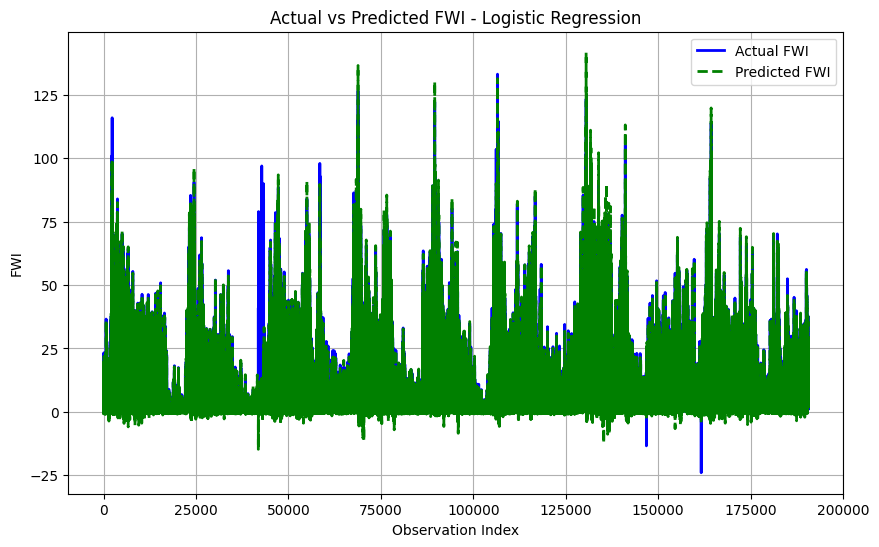

In [33]:
# Actual values
y_actual_log = mb_data['FWI']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_actual_log)), y_actual_log, label='Actual FWI', color='blue', linewidth=2)
plt.plot(np.arange(len(y_pred_pol)), y_pred_pol, label='Predicted FWI', color='green', linewidth=2, linestyle='--')

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('FWI')
plt.title('Actual vs Predicted FWI - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
#Saving data and predictions in one file
# Make prediction for Polynomial regression with historical data
mb_data_with_poly_predictions = mb_data.copy()
mb_data_with_poly_predictions["Predicted Fire Weather Index (FWI)"] = y_pred_pol

#Define the function to categorize FWI Levels
def categorize_fwi(fwi):
    if fwi <=5:
        return 'Low'
    elif 5 < fwi <= 10:
        return 'Moderate'
    elif 10 < fwi <= 20:
        return 'High'
    elif 20 < fwi <= 30:
        return 'Very High'
    else:
        return 'Extreme'


# Apply the function to add new column with FWI Levels
mb_data_with_poly_predictions['FWI Levels'] = mb_data_with_poly_predictions["Predicted Fire Weather Index (FWI)"].apply(categorize_fwi)
mb_data_with_poly_predictions.to_csv('mb_data_FWI_vs_Predicted_Polynomial_Regression.csv', index=False)
mb_data_with_poly_predictions.head(5)

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date,Predicted Fire Weather Index (FWI),FWI Levels
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02,2.785939,Low
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02,-0.349005,Low
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02,6.461654,Moderate
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02,0.977139,Low
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02,3.698620,Low


Cross Validation - Polynomial Regression

In [35]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to assess model performance
cv_scores = cross_val_score(poly_model, X_poly, y, cv=5)
print(f'Polynomial Regression Cross Validation Accuracy: {cv_scores.mean():.4f}')
print(f"Standard deviation of cross validation score: {cv_scores.std():.3f}")

Polynomial Regression Cross Validation Accuracy: 0.9924
Standard deviation of cross validation score: 0.004


#### Evaluation Summary - Statistic Comparison Between Regressor Models

In [36]:
# Output scoring of all models
accu_score = pd.DataFrame({
    'Mean Squared Error (MSE)': [rf_mse, b_mse, tree_mse, knn_mse, mr_mse, poly_mse],
    'R-squared (R²)': [rf_r2, b_r2, tree_r2, knn_r2, mr_r2, poly_r2 ],
    'Training Time': [rf_training_time, gb_training_time, dt_training_time, knn_training_time, mr_testing_time, poly_training_time ],
    'Testing Time': [rf_testing_time, gb_testing_time, tree_testing_time, knn_testing_time, mr_testing_time, poly_testing_time ]},
    index=[ 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN Regressor', 'Multivariable Regressor', 'Polynomial Regression'])

accu_score

,Mean Squared Error (MSE),R-squared (R²),Training Time,Testing Time
Random Forest,0.208291,0.997961,80.904214,1.474169
Gradient Boosting,0.216103,0.997884,63.214019,0.489661
Decision Tree,0.446107,0.995633,1.036229,0.024967
KNN Regressor,1.153215,0.988710,0.543591,4.065859
Multivariable Regressor,5.088462,0.950168,0.089743,0.089743
Polynomial Regression,0.584328,0.994278,0.809833,0.017953


###### Note. It is demostrating that the best model comparing R-squared is Polynomial Regression. And, testing  and training time is good enough option as well,MSE is close to cero with 0.58 it is accurate with this regression problem.

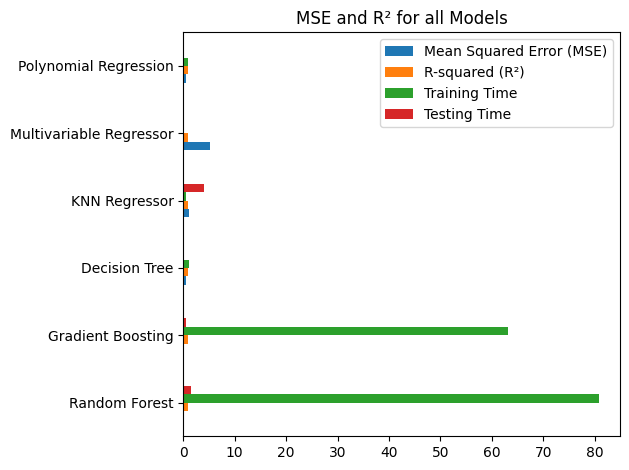

In [37]:
# Model's Statistic Measure Evaluation Plot
accu_score.plot.barh()
plt.legend(loc = 'best')
plt.title('MSE and R² for all Models')
plt.tight_layout()

### Prediction with New Data and Accuracy Evaluation - Using Each Regressor Model - Evaluation

In [38]:
# Using recent report from Manitoba Website - Natural Resources and Northern Development
# link: https://www.gov.mb.ca/conservation_fire/Wx-Report/index.html

data_pred=pd.read_csv('MB-Weather-report_2024-08-28.CSV')

Multivariable Regression Prediction

In [39]:
# Make prediction for Multiple Regression
pred_q=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                     "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"],
                     "FWI":data_pred["FWI"]})
start_time = time.time()
pred_mult= model_all.predict(pred_q)
mr_testing_time = time.time() - start_time
prediction_real = data_pred.copy()
prediction_real["Predicted Fire Weather Index (FWI)"] = pred_mult
prediction_real

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Predicted Fire Weather Index (FWI)
0,ATIK LAKE,21.5,61,149,10.2,0.0,87.6,48.8,429.6,5.0,76.1,16.8,4.0,15.866581
1,BEAUSEJOUR AG,22.7,63,142,23.6,0.0,85.3,34.7,404.4,7.2,57.1,18.7,4.9,16.265085
2,BERENS RIVER (WCF),20.6,57,145,14.0,0.0,84.6,9.1,124.4,4.0,15.4,5.6,0.6,5.789111
3,BIRCH RIVER AG,20.5,50,115,16.0,0.0,88.2,74.8,558.0,7.4,112.1,26.9,9.2,24.865399
4,BISSETT,22.9,57,127,10.9,0.0,84.1,12.5,153.6,3.2,20.8,5.4,0.5,5.411544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,WINNIPEG (XWG),22.7,60,155,23.0,0.0,86.0,38.8,343.9,7.6,60.5,20.2,5.6,17.492343
106,WOODRIDGE,21.0,76,143,12.0,0.5,84.6,24.7,264.0,3.6,40.0,9.0,1.3,8.328541
107,WUSKWATIM,19.6,54,173,20.3,0.0,88.3,19.9,224.0,9.2,32.6,16.9,4.0,15.911278
108,YORKTON (PRJ),20.2,56,139,26.0,0.0,87.9,25.3,449.3,11.6,44.4,23.3,7.2,20.985573


Calculating Residuals for Multivariable Regression Model

In [40]:
# Calculate the residuals
y_true_new= pred_q["FWI"]
residuals = y_true_new - pred_mult


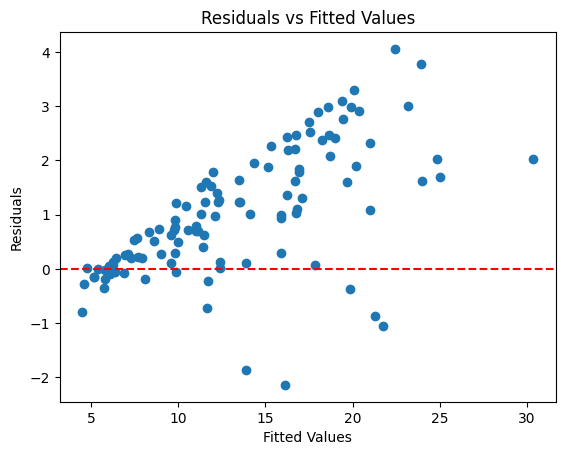

In [41]:
#Plot Residuals vs. Fitted Values
#residuals vs. fitted (predicted) values plot helps in identifying non-linearity, unequal error variances, and outliers.
import matplotlib.pyplot as plt
plt.scatter(pred_mult, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


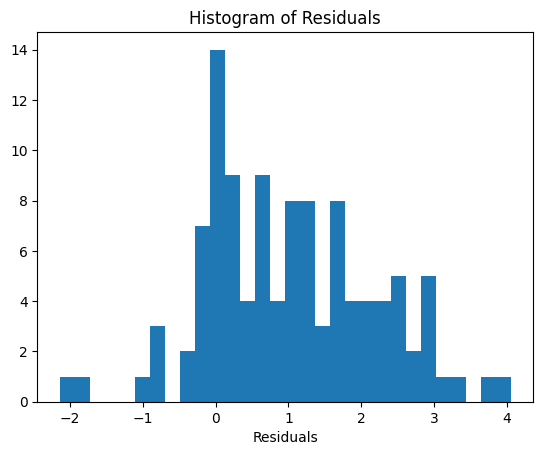

In [42]:
#histogram of residuals helps in checking if the residuals are normally distributed.
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

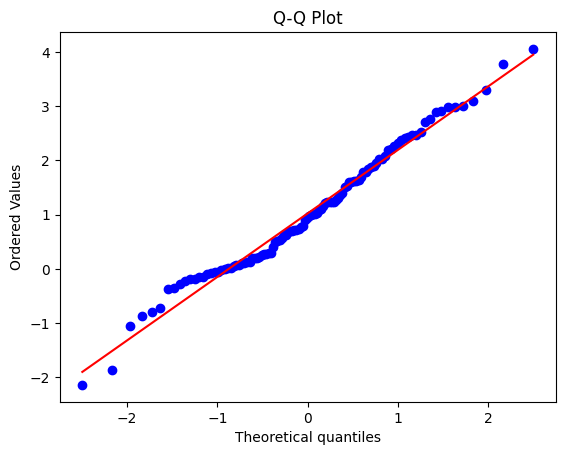

In [43]:
#Q-Q Plot - Multivariable Regression 
import scipy.stats as stats
#A Q-Q (quantile-quantile) plot helps in checking the normality of residuals. 
# If residuals are normally distributed, the points should lie approximately along a straight line.
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


Polynomial Regression Prediction

In [44]:
# Make prediction for Polynomial regression
new_pred=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})
new_data_poly = poly.transform(new_pred)
predictions_poly = poly_model.predict(new_data_poly)
new_data_with_predictions = data_pred.copy()
new_data_with_predictions["Predicted Fire Weather Index (FWI)"] = predictions_poly

#Define the function to categorize FWI Levels
def categorize_fwi(fwi):
    if fwi <=5:
        return 'Low'
    elif 5 < fwi <= 10:
        return 'Moderate'
    elif 10 < fwi <= 20:
        return 'High'
    elif 20 < fwi <= 30:
        return 'Very High'
    else:
        return 'Extreme'


# Apply the function to add new column with FWI Levels
new_data_with_predictions['FWI Levels'] = new_data_with_predictions["Predicted Fire Weather Index (FWI)"].apply(categorize_fwi)


new_data_with_predictions

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Predicted Fire Weather Index (FWI),FWI Levels
0,ATIK LAKE,21.5,61,149,10.2,0.0,87.6,48.8,429.6,5.0,76.1,16.8,4.0,16.562006,High
1,BEAUSEJOUR AG,22.7,63,142,23.6,0.0,85.3,34.7,404.4,7.2,57.1,18.7,4.9,18.449213,High
2,BERENS RIVER (WCF),20.6,57,145,14.0,0.0,84.6,9.1,124.4,4.0,15.4,5.6,0.6,5.390683,Moderate
3,BIRCH RIVER AG,20.5,50,115,16.0,0.0,88.2,74.8,558.0,7.4,112.1,26.9,9.2,26.839555,Very High
4,BISSETT,22.9,57,127,10.9,0.0,84.1,12.5,153.6,3.2,20.8,5.4,0.5,5.071833,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,WINNIPEG (XWG),22.7,60,155,23.0,0.0,86.0,38.8,343.9,7.6,60.5,20.2,5.6,19.798055,High
106,WOODRIDGE,21.0,76,143,12.0,0.5,84.6,24.7,264.0,3.6,40.0,9.0,1.3,8.701533,Moderate
107,WUSKWATIM,19.6,54,173,20.3,0.0,88.3,19.9,224.0,9.2,32.6,16.9,4.0,16.944618,High
108,YORKTON (PRJ),20.2,56,139,26.0,0.0,87.9,25.3,449.3,11.6,44.4,23.3,7.2,23.230152,Very High


In [45]:
#Save cleaned and prepared dataset
#new_data_with_predictions.to_csv('report_data_pred_poly.csv', index=False)

Calculating Residuals for Polynomial Regression Model

In [46]:
# Step 1: Calculate Residuals
residuals2 = y_true_new - predictions_poly

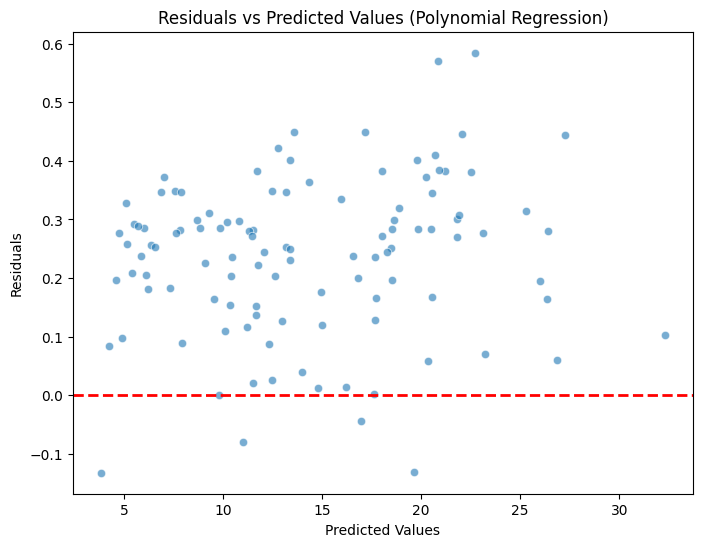

In [47]:
#Step 2: Plot Residuals vs Predicted Values
#residuals vs. fitted (predicted) values plot helps in identifying non-linearity, unequal error variances, and outliers.
plt.figure(figsize=(8, 6))
plt.scatter(predictions_poly, residuals2, alpha=0.6, edgecolors='w', linewidth=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values (Polynomial Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

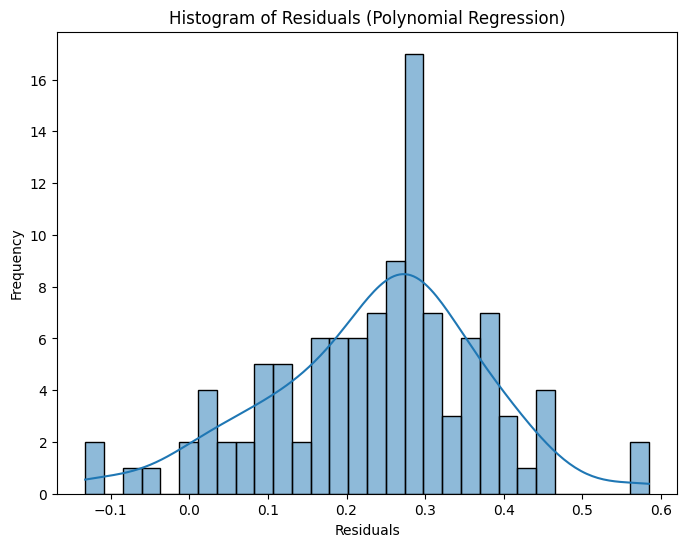

In [48]:
# Step 3: Plot the histogram of residuals to check for normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals2, kde=True, bins=30)
plt.title('Histogram of Residuals (Polynomial Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


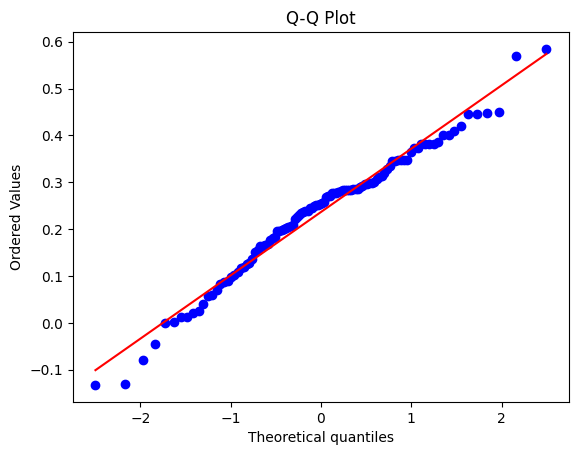

In [49]:
#Q-Q Plot - Multivariable Regression 
import scipy.stats as stats
#A Q-Q (quantile-quantile) plot helps in checking the normality of residuals. 
# If residuals are normally distributed, the points should lie approximately along a straight line.
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

Random Forest Regression Prediction

In [50]:
# Make prediction for random forest regression
pred_f=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})
pred_f["Predicted Fire Weather Index(FWI)"] = rf.predict(pred_f)
pred_f

c:\Users\pato-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted Fire Weather Index(FWI)
0,21.5,61,10.2,0.0,87.6,48.8,5.0,76.1,124.915
1,22.7,63,23.6,0.0,85.3,34.7,7.2,57.1,124.915
2,20.6,57,14.0,0.0,84.6,9.1,4.0,15.4,124.915
3,20.5,50,16.0,0.0,88.2,74.8,7.4,112.1,124.915
4,22.9,57,10.9,0.0,84.1,12.5,3.2,20.8,124.915
...,...,...,...,...,...,...,...,...,...
105,22.7,60,23.0,0.0,86.0,38.8,7.6,60.5,124.915
106,21.0,76,12.0,0.5,84.6,24.7,3.6,40.0,125.795
107,19.6,54,20.3,0.0,88.3,19.9,9.2,32.6,124.915
108,20.2,56,26.0,0.0,87.9,25.3,11.6,44.4,124.915


In [51]:
feature_names = X.columns.tolist()
feature_names

['TEMP', 'RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'ISI', 'BUI']

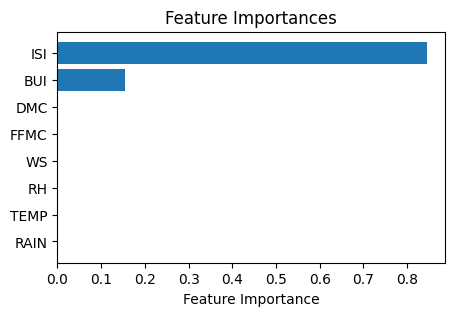

In [52]:
importances = rf.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(5, 3))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.show()

Gradient Boosting Regression Prediction

In [53]:
# Make prediction for gradient boosting regression
pred_b=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})

pred_b["Predicted Fire Weather Index(FWI)"] = gb.predict(pred_b)
pred_b

c:\Users\pato-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted Fire Weather Index(FWI)
0,21.5,61,10.2,0.0,87.6,48.8,5.0,76.1,129.863521
1,22.7,63,23.6,0.0,85.3,34.7,7.2,57.1,129.863521
2,20.6,57,14.0,0.0,84.6,9.1,4.0,15.4,129.863521
3,20.5,50,16.0,0.0,88.2,74.8,7.4,112.1,129.863521
4,22.9,57,10.9,0.0,84.1,12.5,3.2,20.8,129.863521
...,...,...,...,...,...,...,...,...,...
105,22.7,60,23.0,0.0,86.0,38.8,7.6,60.5,129.863521
106,21.0,76,12.0,0.5,84.6,24.7,3.6,40.0,130.734573
107,19.6,54,20.3,0.0,88.3,19.9,9.2,32.6,129.863521
108,20.2,56,26.0,0.0,87.9,25.3,11.6,44.4,129.863521


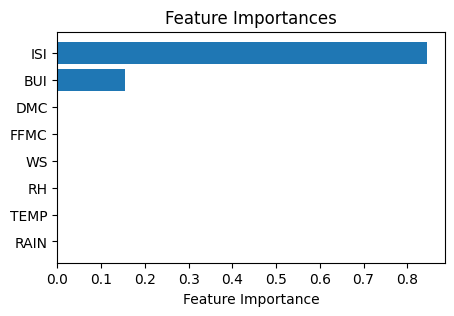

In [54]:
importances1 = gb.feature_importances_
sorted_indices = importances1.argsort()

plt.figure(figsize=(5, 3))
plt.title('Feature Importances')
plt.barh(range(len(importances1)), importances1[sorted_indices], align='center')
plt.yticks(range(len(importances1)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.show()

###### Note. both assemble models are not using all features, which is the reason for the predictions to being not accurate.

KNN Regression Prediction

In [55]:
# Make prediction for KNN regression
pred_knn=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})

pred_knn["Predicted Fire Weather Index(FWI)"] = knn.predict(pred_knn)
pred_knn

c:\Users\pato-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted Fire Weather Index(FWI)
0,21.5,61,10.2,0.0,87.6,48.8,5.0,76.1,35.94
1,22.7,63,23.6,0.0,85.3,34.7,7.2,57.1,23.68
2,20.6,57,14.0,0.0,84.6,9.1,4.0,15.4,13.00
3,20.5,50,16.0,0.0,88.2,74.8,7.4,112.1,43.54
4,22.9,57,10.9,0.0,84.1,12.5,3.2,20.8,15.92
...,...,...,...,...,...,...,...,...,...
105,22.7,60,23.0,0.0,86.0,38.8,7.6,60.5,35.94
106,21.0,76,12.0,0.5,84.6,24.7,3.6,40.0,20.44
107,19.6,54,20.3,0.0,88.3,19.9,9.2,32.6,23.68
108,20.2,56,26.0,0.0,87.9,25.3,11.6,44.4,23.68


###### Note. This is also a model with close prediction to the reality but still there is not good accuracy enough to be selected.

Decision Tree Regression Prediction

In [56]:
# Make prediction for Decision Tree regression
pred_tree=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})

pred_tree["Predicted Fire Weather Index(FWI)"] = dt.predict(pred_tree)
pred_tree

c:\Users\pato-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted Fire Weather Index(FWI)
0,21.5,61,10.2,0.0,87.6,48.8,5.0,76.1,133.2
1,22.7,63,23.6,0.0,85.3,34.7,7.2,57.1,133.2
2,20.6,57,14.0,0.0,84.6,9.1,4.0,15.4,133.2
3,20.5,50,16.0,0.0,88.2,74.8,7.4,112.1,133.2
4,22.9,57,10.9,0.0,84.1,12.5,3.2,20.8,133.2
...,...,...,...,...,...,...,...,...,...
105,22.7,60,23.0,0.0,86.0,38.8,7.6,60.5,133.2
106,21.0,76,12.0,0.5,84.6,24.7,3.6,40.0,133.2
107,19.6,54,20.3,0.0,88.3,19.9,9.2,32.6,133.2
108,20.2,56,26.0,0.0,87.9,25.3,11.6,44.4,133.2


Conclusion Model Development and Statistic Analysis

Conclusion, after modeling with the above model types, the best option to implement is Polynomial Regression, with a R-squared of 0.99 and MSE 0.58 which is a reduced error. The tested part with a real and lastest report is showing the prediction is closest to the real FWI reported, the other models didn't have good behavior even with tunning and optimizated parameters, also the polynomial model contains FWI Levels base on the numerical prediction results.
The Cross Validation Evaluation has an accuracy of 99% and a Standar Deviation of 0.04% which are great results for the model.